# Introduction

Goals:
* Determine if certain residue positions move more than others
* Determine if movement is plastic versus rigid body deformation

In [1]:
import os
import itertools
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from python_pdb.parsers import parse_pdb
from python_pdb.comparisons import rmsd
from tcr_structure_tools.cdr_numbering import assign_cdr_number

In [2]:
DATA_DIR = '/project/koohylab/bmcmaste/projects/tcr-loop-comparison/data/apo-holo-mhc-class-I-synthetic_refined_aligned'

# Measuring movement for each residue position

## Ca movement

In [5]:
CHAIN_ANNOTATIONS = {
    'D': 'alpha_chain', 
    'E': 'beta_chain', 
    'C': 'antigen_chain', 
    'A': 'mhc_chain',
}

def get_coords(df):
    return df[['pos_x', 'pos_y', 'pos_z']].to_numpy()

def get_distance(vec1, vec2):
    xx = np.square(vec1[:, 0] - vec2[:, 0])
    yy = np.square(vec1[:, 1] - vec2[:, 1])
    zz = np.square(vec1[:, 2] - vec2[:, 2])
    
    return np.sqrt(xx + yy + zz)

In [9]:
groups = []
struct1s = []
struct2s = []
cdrs = []
chain_types = []
residue_names = []
residue_seq_ids = []
residue_insert_codes = []
ca_distances = []


for group in os.listdir(DATA_DIR):
    pdb_files = [file for file in os.listdir(os.path.join(DATA_DIR, group)) if file.endswith('.pdb')]
    print(group)
    
    for path1, path2 in itertools.combinations(pdb_files, 2):
        print(path1, path2)
        # Load Structures
        with open(os.path.join(DATA_DIR, group, path1), 'r') as fh:
            structure1_df = parse_pdb(fh.read(), silent=True).to_pandas()
        
        with open(os.path.join(DATA_DIR, group, path2), 'r') as fh:
            structure2_df = parse_pdb(fh.read(), silent=True).to_pandas()
        
        # Annotate records
        structure1_df['chain_type'] = structure1_df['chain_id'].map(lambda chain_id: CHAIN_ANNOTATIONS[chain_id])
        structure2_df['chain_type'] = structure2_df['chain_id'].map(lambda chain_id: CHAIN_ANNOTATIONS[chain_id])
        
        structure1_df['cdr'] = structure1_df['residue_seq_id'].map(assign_cdr_number)
        structure2_df['cdr'] = structure2_df['residue_seq_id'].map(assign_cdr_number)
        
        # Query desired residues/atoms
        for chain_type, cdr_number in itertools.product(['alpha_chain', 'beta_chain'], [1, 2, 3]):
            print(cdr_number, chain_type)
            
            struct_1_cdr = structure1_df.query("cdr == @cdr_number and chain_type == @chain_type and atom_name == 'CA'")
            struct_2_cdr = structure2_df.query("cdr == @cdr_number and chain_type == @chain_type and atom_name == 'CA'")
            
            # Compute distance
            distance = get_distance(get_coords(struct_1_cdr), get_coords(struct_2_cdr))
            
            # append values to lists
            num_residues = len(distance)
            
            residue_names += struct_1_cdr['residue_name'].to_list()
            residue_seq_ids += struct_1_cdr['residue_seq_id'].to_list()
            residue_insert_codes += struct_1_cdr['residue_insert_code'].to_list()
            
            ca_distances += list(distance)
            
            groups += [group] * num_residues
            struct1s += [path1] * num_residues
            struct2s += [path2] * num_residues
            
            cdrs += [cdr_number] * num_residues
            chain_types += [chain_type] * num_residues
        
        print()

results_ca = pd.DataFrame({
    'group': groups,
    'struct1': struct1s,
    'struct2': struct2s,
    'cdr': cdrs,
    'chain_type': chain_types,
    'residue_name': residue_names,
    'residue_seq_id': residue_seq_ids,
    'residue_insert_code': residue_insert_codes,
    'ca_distance': ca_distances,
})
results_ca

AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-ATYLCVVQPGGYQKVTFGTGTK-TLQCAQDMNHNSMYWYRQD-GLRLIYYSASEGTTDKGEVPNGYNVSR-SVYFCASSEGLWQVGDEQYFGPGTR
6vrm_DEPA_holo_ranked_2.pdb 6vrm_DEPA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6vrm_DEPA_holo_ranked_2.pdb 6vrm_DEPA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6vrm_DEPA_holo_ranked_2.pdb 6vth_DE_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6vrm_DEPA_holo_ranked_2.pdb 6vth_DE_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6vrm_DEPA_holo_ranked_2.pdb 6vth_DE_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6vrm_DEPA_holo_ranked_2.pdb 6vrm_DEPA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6vrm_DEPA_holo_ranked_2.pdb 6vth_DE_apo_

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfh_DE_apo_ranked_2.pdb 4jff_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfh_DE_apo_ranked_2.pdb 4jff_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfh_DE_apo_ranked_2.pdb 4jfe_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfh_DE_apo_ranked_2.pdb 4jfd_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfh_DE_apo_ranked_2.pdb 6tmo_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfh_DE_apo_ranked_2.pdb 4jfh_DE_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfh_DE_apo_ranked_2.pdb 4jfd_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 b

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_3.pdb 4jfh_DE_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_3.pdb 4jfd_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_3.pdb 4jfd_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_3.pdb 4jfd_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_3.pdb 6tmo_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_3.pdb 4jff_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_3.pdb 4jff_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_c

1 beta_chain
2 beta_chain
3 beta_chain

6eqb_DECA_holo_ranked_4.pdb 4jfe_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfh_DE_apo_ranked_0.pdb 6eqb_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfh_DE_apo_ranked_0.pdb 4jfd_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfh_DE_apo_ranked_0.pdb 6eqb_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfh_DE_apo_ranked_0.pdb 4jfh_DE_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfh_DE_apo_ranked_0.pdb 6tmo_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfh_DE_apo_ranked_0.pdb 4jfe_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfh_DE_apo_ran

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfd_DECA_holo_ranked_3.pdb 4jfd_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfd_DECA_holo_ranked_3.pdb 4jfd_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfd_DECA_holo_ranked_3.pdb 4jfd_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfd_DECA_holo_ranked_3.pdb 6tmo_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfd_DECA_holo_ranked_3.pdb 4jff_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfd_DECA_holo_ranked_3.pdb 4jff_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfd_DECA_holo_ranked_3.pdb 4jff_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alph

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_4.pdb 4jfd_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_4.pdb 4jfd_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_4.pdb 6tmo_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_4.pdb 4jff_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_4.pdb 4jff_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_4.pdb 4jff_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_4.pdb 6tmo_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alph

3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6eqb_DECA_holo_ranked_1.pdb 4jff_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6eqb_DECA_holo_ranked_1.pdb 4jfe_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6eqb_DECA_holo_ranked_1.pdb 4jfd_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6eqb_DECA_holo_ranked_1.pdb 6tmo_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6eqb_DECA_holo_ranked_1.pdb 4jfh_DE_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6eqb_DECA_holo_ranked_1.pdb 4jfd_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6eqb_DECA_holo_ranked_1.pdb 4jfd_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_cha

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfd_DECA_holo_ranked_0.pdb 4jff_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfd_DECA_holo_ranked_0.pdb 6tmo_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfd_DECA_holo_ranked_0.pdb 4jfe_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_2.pdb 4jfh_DE_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_2.pdb 4jfd_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_2.pdb 4jfd_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_2.pdb 4jfd_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_c

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6amu_DECA_holo_ranked_0.pdb 3qdg_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6amu_DECA_holo_ranked_0.pdb 3qeu_DE_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6amu_DECA_holo_ranked_0.pdb 3qeu_DE_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6amu_DECA_holo_ranked_0.pdb 6amu_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6amu_DECA_holo_ranked_0.pdb 3qdj_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6amu_DECA_holo_ranked_0.pdb 3qdg_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6amu_DECA_holo_ranked_0.pdb 3qdj_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chai

3 beta_chain

3qdg_DECA_holo_ranked_4.pdb 3qeu_DE_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdg_DECA_holo_ranked_4.pdb 3qeu_DE_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdg_DECA_holo_ranked_4.pdb 3qeu_DE_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdg_DECA_holo_ranked_4.pdb 6am5_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdg_DECA_holo_ranked_4.pdb 6amu_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdg_DECA_holo_ranked_4.pdb 3qdg_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdg_DECA_holo_ranked_4.pdb 6am5_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdg_DECA_holo_ranked_1.pdb 3

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qeu_DE_apo_ranked_0.pdb 3qeu_DE_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qeu_DE_apo_ranked_0.pdb 6am5_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qeu_DE_apo_ranked_0.pdb 6amu_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qeu_DE_apo_ranked_0.pdb 3qdg_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qeu_DE_apo_ranked_0.pdb 6am5_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6amu_DECA_holo_ranked_1.pdb 3qdj_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6amu_DECA_holo_ranked_1.pdb 3qdg_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_cha


3qdj_DECA_holo_ranked_3.pdb 6amu_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdj_DECA_holo_ranked_3.pdb 3qdj_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdj_DECA_holo_ranked_3.pdb 6amu_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdj_DECA_holo_ranked_3.pdb 3qeu_DE_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdj_DECA_holo_ranked_3.pdb 3qeu_DE_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdj_DECA_holo_ranked_3.pdb 3qeu_DE_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdj_DECA_holo_ranked_3.pdb 6am5_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdj_DECA_holo_ranked_3.pdb 6amu_DECA_holo


6am5_DECA_holo_ranked_4.pdb 3qdj_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6am5_DECA_holo_ranked_4.pdb 6amu_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6am5_DECA_holo_ranked_4.pdb 3qeu_DE_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6am5_DECA_holo_ranked_4.pdb 3qeu_DE_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6am5_DECA_holo_ranked_4.pdb 3qeu_DE_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6am5_DECA_holo_ranked_4.pdb 6am5_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6am5_DECA_holo_ranked_4.pdb 6amu_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6am5_DECA_holo_ranked_4.pdb 3qdg_DECA_holo

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nmd_CD_apo_ranked_2.pdb 5nmg_IJHF_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nmd_CD_apo_ranked_2.pdb 5nme_IJHF_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nmd_CD_apo_ranked_2.pdb 5nmd_CD_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nmd_CD_apo_ranked_2.pdb 5nmf_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nmd_CD_apo_ranked_2.pdb 5nmg_IJHF_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nmd_CD_apo_ranked_2.pdb 5nmf_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nmd_CD_apo_ranked_2.pdb 5nmf_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 b


5nmf_DECA_holo_ranked_3.pdb 5nmf_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nmf_DECA_holo_ranked_3.pdb 5nme_IJHF_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nmf_DECA_holo_ranked_3.pdb 5nmg_IJHF_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nmf_DECA_holo_ranked_3.pdb 5nmd_CD_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nme_IJHF_holo_ranked_2.pdb 5nmd_CD_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nme_IJHF_holo_ranked_2.pdb 5nmg_IJHF_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nme_IJHF_holo_ranked_2.pdb 5nmg_IJHF_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nme_IJHF_holo_ranked_2.pdb 5nme_IJHF_h

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nme_IJHF_holo_ranked_0.pdb 5nmf_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nme_IJHF_holo_ranked_0.pdb 5nmf_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nme_IJHF_holo_ranked_0.pdb 5nme_IJHF_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nme_IJHF_holo_ranked_0.pdb 5nme_IJHF_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nme_IJHF_holo_ranked_0.pdb 5nmf_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nme_IJHF_holo_ranked_0.pdb 5nme_IJHF_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nme_IJHF_holo_ranked_0.pdb 5nmg_IJHF_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alph

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nme_IJHF_holo_ranked_3.pdb 5nmd_CD_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nmg_IJHF_holo_ranked_2.pdb 5nmd_CD_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

VLNCSFTDSAIYNLQWFRQD-GLTSLLLIQSSQREQTSGRLNASL-ATYLCAVRMDSSYKLIFGSGTR-TFRCDPISEHNRLYWYRQT-GPEFLTYFQNEAQLEKSRLLSDRFSAER-AMYLCASSSWDTGELFFGEGSR
3vxq_AB_apo_ranked_3.pdb 3vxs_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxq_AB_apo_ranked_3.pdb 3vxr_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxq_AB_apo_ranked_3.pdb 3vxr_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxq_AB_apo_ranked_3.pdb 3vxs_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_


3vxs_DECA_holo_ranked_3.pdb 3vxq_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxs_DECA_holo_ranked_3.pdb 3vxs_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxs_DECA_holo_ranked_3.pdb 3vxs_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxq_AB_apo_ranked_2.pdb 3vxq_AB_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxq_AB_apo_ranked_2.pdb 3vxr_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxq_AB_apo_ranked_2.pdb 3vxr_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxq_AB_apo_ranked_2.pdb 3vxq_AB_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxq_AB_apo_ranked_2.pdb 3vxr_DECA_holo_ranked_1.pdb
1

3 beta_chain

7n1f_DECA_holo_ranked_4.pdb 7rtr_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1d_AB_apo_ranked_3.pdb 7n1f_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1d_AB_apo_ranked_3.pdb 7n1f_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1d_AB_apo_ranked_3.pdb 7rtr_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1d_AB_apo_ranked_3.pdb 7n1d_AB_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1d_AB_apo_ranked_3.pdb 7rtr_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1d_AB_apo_ranked_3.pdb 7n1d_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1d_AB_apo_ranked_3.pdb 7n1f_DECA_holo_rank

3 beta_chain

7rtr_DECA_holo_ranked_2.pdb 7n1f_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7rtr_DECA_holo_ranked_2.pdb 7n1d_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7rtr_DECA_holo_ranked_2.pdb 7rtr_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1d_AB_apo_ranked_0.pdb 7n1f_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1d_AB_apo_ranked_0.pdb 7n1d_AB_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1d_AB_apo_ranked_0.pdb 7rtr_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1d_AB_apo_ranked_0.pdb 7rtr_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1d_AB_apo_ranked_0.pdb 7n1f_DECA_hol

3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_1.pdb 3pwp_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_1.pdb 1ao7_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_1.pdb 3qfj_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_1.pdb 1qsf_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_1.pdb 3d3v_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_1.pdb 3qh3_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_1.pdb 1ao7_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_cha

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_4.pdb 3pwp_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_4.pdb 3d39_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_4.pdb 1qrn_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_4.pdb 3pwp_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_4.pdb 1qsf_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_4.pdb 1qse_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_4.pdb 1qrn_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alph

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_4.pdb 3d3v_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_4.pdb 3pwp_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_4.pdb 1qsf_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_4.pdb 3h9s_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_4.pdb 3h9s_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_4.pdb 7amp_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_4.pdb 3d39_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 b

3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_0.pdb 3qh3_AB_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_0.pdb 3h9s_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_0.pdb 1qse_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_0.pdb 3pwp_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_0.pdb 3d3v_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_0.pdb 7amp_AB_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_0.pdb 3d39_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain



1qrn_DECA_holo_ranked_3.pdb 1qse_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_3.pdb 3qh3_AB_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_3.pdb 3d39_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_3.pdb 7amp_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_3.pdb 3d39_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_3.pdb 1qsf_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_3.pdb 7amp_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_3.pdb 3qfj_DECA_holo

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_1.pdb 1ao7_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_1.pdb 3qfj_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_1.pdb 1qsf_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_1.pdb 3d3v_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_1.pdb 3qh3_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_1.pdb 1ao7_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_1.pdb 3pwp_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_c

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_4.pdb 3h9s_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_4.pdb 3d3v_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_4.pdb 3pwp_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_4.pdb 1qsf_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_4.pdb 3h9s_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_4.pdb 3h9s_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_4.pdb 7amp_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 b

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_2.pdb 3qfj_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_2.pdb 1qsf_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_2.pdb 1qse_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_2.pdb 3qh3_AB_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_2.pdb 3d39_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_2.pdb 7amp_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_2.pdb 3d39_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chai

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_3.pdb 3qfj_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_3.pdb 1qsf_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_3.pdb 3d3v_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_3.pdb 3qh3_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_3.pdb 1ao7_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_3.pdb 3pwp_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_3.pdb 3d39_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_c


3d3v_DECA_holo_ranked_0.pdb 3pwp_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_0.pdb 1qsf_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_0.pdb 3h9s_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_0.pdb 3h9s_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_0.pdb 7amp_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_0.pdb 3d39_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_1.pdb 3d39_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_1.pdb 3qh3_AB_apo_ra

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d39_DECA_holo_ranked_3.pdb 1qrn_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d39_DECA_holo_ranked_3.pdb 3pwp_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d39_DECA_holo_ranked_3.pdb 1ao7_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d39_DECA_holo_ranked_3.pdb 3qfj_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d39_DECA_holo_ranked_3.pdb 1qsf_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d39_DECA_holo_ranked_3.pdb 3d3v_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d39_DECA_holo_ranked_3.pdb 3qh3_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_c

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_3.pdb 3h9s_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_3.pdb 3h9s_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_3.pdb 7amp_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_3.pdb 3d39_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_1.pdb 3qfj_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_1.pdb 1qsf_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_1.pdb 1qse_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_2.pdb 3qh3_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_2.pdb 1ao7_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_2.pdb 3pwp_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_2.pdb 3d39_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_2.pdb 1qrn_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_2.pdb 3pwp_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_2.pdb 1qsf_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_c


1qse_DECA_holo_ranked_0.pdb 7amp_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_0.pdb 3d39_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_0.pdb 1qsf_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_0.pdb 7amp_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_0.pdb 3qfj_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_0.pdb 1ao7_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_0.pdb 1ao7_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_0.pdb 3d3v_DECA_h

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_1.pdb 3h9s_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_1.pdb 3d3v_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_1.pdb 3pwp_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_1.pdb 1qsf_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_1.pdb 3h9s_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_1.pdb 3h9s_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_1.pdb 7amp_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 b

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_2.pdb 1qse_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_2.pdb 1qrn_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_2.pdb 1qse_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_2.pdb 1ao7_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_2.pdb 3qh3_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_2.pdb 3h9s_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_2.pdb 3d3v_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 b

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qsf_DECA_holo_ranked_1.pdb 3pwp_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qsf_DECA_holo_ranked_1.pdb 1qsf_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qsf_DECA_holo_ranked_1.pdb 1qse_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qsf_DECA_holo_ranked_1.pdb 1qrn_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qsf_DECA_holo_ranked_1.pdb 1qse_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qsf_DECA_holo_ranked_1.pdb 1ao7_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qsf_DECA_holo_ranked_1.pdb 3qh3_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_c

1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_4.pdb 1qsf_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_4.pdb 1qse_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_4.pdb 1qrn_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_4.pdb 1qse_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_4.pdb 1ao7_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_4.pdb 3qh3_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_4.pdb 3h9s_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chai

1 beta_chain
2 beta_chain
3 beta_chain

1ao7_DECA_holo_ranked_1.pdb 3qh3_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1ao7_DECA_holo_ranked_1.pdb 3h9s_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1ao7_DECA_holo_ranked_1.pdb 3d3v_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1ao7_DECA_holo_ranked_1.pdb 3pwp_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1ao7_DECA_holo_ranked_1.pdb 1qsf_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1ao7_DECA_holo_ranked_1.pdb 3h9s_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1ao7_DECA_holo_ranked_1.pdb 3h9s_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chai

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_0.pdb 1ao7_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_0.pdb 3qfj_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_0.pdb 1qsf_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_0.pdb 3d3v_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_0.pdb 3qh3_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_0.pdb 1ao7_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_0.pdb 3pwp_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_c

2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_3.pdb 3qh3_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_3.pdb 3h9s_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_3.pdb 3d3v_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_3.pdb 3pwp_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_3.pdb 1qsf_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_3.pdb 3h9s_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_3.pdb 3h9s_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_ch

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_0.pdb 3qh3_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_0.pdb 3h9s_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_0.pdb 3d3v_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_0.pdb 3pwp_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_0.pdb 1qsf_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_0.pdb 3h9s_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_0.pdb 3h9s_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 b

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_4.pdb 3pwp_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_4.pdb 1qsf_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_4.pdb 1qse_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_4.pdb 1qrn_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_4.pdb 1qse_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_4.pdb 1ao7_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_4.pdb 3qh3_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_c

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_2.pdb 3h9s_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_2.pdb 3h9s_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_2.pdb 7amp_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_2.pdb 3d39_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_3.pdb 1ao7_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_3.pdb 3qh3_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_3.pdb 3h9s_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chai

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3kpr_DECA_holo_ranked_1.pdb 1mi5_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3kpr_DECA_holo_ranked_1.pdb 1kgc_DE_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3kpr_DECA_holo_ranked_1.pdb 3kpr_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3kpr_DECA_holo_ranked_1.pdb 1kgc_DE_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3kpr_DECA_holo_ranked_1.pdb 1kgc_DE_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3kpr_DECA_holo_ranked_1.pdb 1mi5_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3kpr_DECA_holo_ranked_1.pdb 1mi5_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1kgc_DE_apo_ranked_3.pdb 3kpr_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1kgc_DE_apo_ranked_3.pdb 1kgc_DE_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1kgc_DE_apo_ranked_3.pdb 3kps_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1kgc_DE_apo_ranked_3.pdb 3kps_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1kgc_DE_apo_ranked_3.pdb 3kpr_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1kgc_DE_apo_ranked_3.pdb 3kps_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1kgc_DE_apo_ranked_3.pdb 3kps_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 b

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1mi5_DECA_holo_ranked_1.pdb 1mi5_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1mi5_DECA_holo_ranked_1.pdb 1kgc_DE_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1mi5_DECA_holo_ranked_2.pdb 3kps_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1mi5_DECA_holo_ranked_2.pdb 3kpr_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1mi5_DECA_holo_ranked_2.pdb 3kpr_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1mi5_DECA_holo_ranked_2.pdb 1kgc_DE_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1mi5_DECA_holo_ranked_2.pdb 3kps_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chai

3 beta_chain

3kpr_DECA_holo_ranked_0.pdb 1mi5_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3kpr_DECA_holo_ranked_0.pdb 1kgc_DE_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3kps_DECA_holo_ranked_4.pdb 3kps_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3kps_DECA_holo_ranked_4.pdb 1mi5_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3kps_DECA_holo_ranked_4.pdb 1kgc_DE_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3kps_DECA_holo_ranked_3.pdb 1mi5_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3kps_DECA_holo_ranked_3.pdb 1kgc_DE_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1mi5_DECA_holo_ranked_3.pdb 1

2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2pye_DECA_holo_ranked_3.pdb 2pyf_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2pye_DECA_holo_ranked_3.pdb 2pye_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2pye_DECA_holo_ranked_3.pdb 2pye_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2pye_DECA_holo_ranked_3.pdb 2pyf_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2pye_DECA_holo_ranked_1.pdb 2pye_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2pye_DECA_holo_ranked_1.pdb 2pyf_AB_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2pye_DECA_holo_ranked_1.pdb 2pyf_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 bet


7r80_ABEC_holo_ranked_3.pdb 7r7z_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7r80_ABEC_holo_ranked_3.pdb 7r80_ABEC_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7r80_ABEC_holo_ranked_3.pdb 7r80_ABEC_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7r80_ABEC_holo_ranked_3.pdb 7r7z_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7r7z_AB_apo_ranked_3.pdb 7r80_ABEC_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7r7z_AB_apo_ranked_3.pdb 7r7z_AB_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7r7z_AB_apo_ranked_3.pdb 7r7z_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7r7z_AB_apo_ranked_3.pdb 7r80_ABEC_holo_ranked_0.pdb
1

2 beta_chain
3 beta_chain

3w0w_DECA_holo_ranked_2.pdb 3vxu_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3w0w_DECA_holo_ranked_2.pdb 3w0w_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3w0w_DECA_holo_ranked_2.pdb 3vxt_CD_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3w0w_DECA_holo_ranked_2.pdb 3w0w_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3w0w_DECA_holo_ranked_1.pdb 3vxu_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3w0w_DECA_holo_ranked_1.pdb 3vxt_CD_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3w0w_DECA_holo_ranked_1.pdb 3vxt_CD_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3w0w_DECA_holo_r

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3w0w_DECA_holo_ranked_3.pdb 3w0w_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3w0w_DECA_holo_ranked_3.pdb 3vxt_CD_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3w0w_DECA_holo_ranked_3.pdb 3w0w_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxu_DECA_holo_ranked_0.pdb 3w0w_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxu_DECA_holo_ranked_0.pdb 3vxt_CD_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxu_DECA_holo_ranked_0.pdb 3w0w_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3w0w_DECA_holo_ranked_4.pdb 3vxt_CD_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1


5hhm_IJHF_holo_ranked_3.pdb 5hhm_IJHF_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_3.pdb 2vlk_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_3.pdb 2xna_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_3.pdb 2vlk_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_3.pdb 2xn9_AB_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_3.pdb 1oga_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_3.pdb 2vlk_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_3.pdb 2vlk_DECA_h


5hhm_IJHF_holo_ranked_2.pdb 2xn9_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlm_DE_apo_ranked_0.pdb 2vlm_DE_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlm_DE_apo_ranked_0.pdb 1oga_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlm_DE_apo_ranked_0.pdb 2xn9_AB_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlm_DE_apo_ranked_0.pdb 5hhm_IJHF_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlm_DE_apo_ranked_0.pdb 2vlk_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlm_DE_apo_ranked_0.pdb 2xna_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlm_DE_apo_ranked_0.pdb 2vlk_DECA_holo_ranked_2.pdb
1 alpha_ch

2 beta_chain
3 beta_chain

1oga_DECA_holo_ranked_0.pdb 2xn9_AB_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1oga_DECA_holo_ranked_0.pdb 5hhm_IJHF_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1oga_DECA_holo_ranked_0.pdb 2vlk_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1oga_DECA_holo_ranked_0.pdb 2xna_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1oga_DECA_holo_ranked_0.pdb 2vlk_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1oga_DECA_holo_ranked_0.pdb 2xn9_AB_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1oga_DECA_holo_ranked_0.pdb 1oga_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1oga_DECA_holo_r

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_1.pdb 2vlk_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_1.pdb 2xn9_AB_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_1.pdb 1oga_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_1.pdb 2vlk_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_1.pdb 2vlk_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_1.pdb 2vlj_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_1.pdb 2vlj_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_c

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2xna_AB_apo_ranked_3.pdb 2xn9_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2xna_AB_apo_ranked_3.pdb 5hhm_IJHF_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2xna_AB_apo_ranked_3.pdb 2vlk_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2xna_AB_apo_ranked_3.pdb 2vlj_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2xna_AB_apo_ranked_3.pdb 2xna_AB_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2xna_AB_apo_ranked_3.pdb 2vlj_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2xna_AB_apo_ranked_3.pdb 2xna_AB_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_ch

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2xn9_AB_apo_ranked_1.pdb 5hhm_IJHF_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2xn9_AB_apo_ranked_1.pdb 2vlm_DE_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2xn9_AB_apo_ranked_1.pdb 2xn9_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2xn9_AB_apo_ranked_1.pdb 1oga_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2xn9_AB_apo_ranked_1.pdb 2xn9_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1oga_DECA_holo_ranked_4.pdb 2vlk_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1oga_DECA_holo_ranked_4.pdb 2vlk_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 b

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlk_DECA_holo_ranked_3.pdb 2xna_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlk_DECA_holo_ranked_3.pdb 2vlm_DE_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlk_DECA_holo_ranked_3.pdb 2xna_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlk_DECA_holo_ranked_3.pdb 1oga_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlk_DECA_holo_ranked_3.pdb 1oga_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlk_DECA_holo_ranked_3.pdb 5hhm_IJHF_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlk_DECA_holo_ranked_3.pdb 2vlm_DE_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 be

3 beta_chain

2vlj_DECA_holo_ranked_1.pdb 1oga_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlj_DECA_holo_ranked_1.pdb 5hhm_IJHF_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlj_DECA_holo_ranked_1.pdb 2vlm_DE_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlj_DECA_holo_ranked_1.pdb 2xn9_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlj_DECA_holo_ranked_1.pdb 1oga_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlj_DECA_holo_ranked_1.pdb 2xn9_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2xn9_AB_apo_ranked_2.pdb 5hhm_IJHF_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2xn9_AB_apo_ranked_2.pdb 2vlk_DE

1 beta_chain
2 beta_chain
3 beta_chain

2vlj_DECA_holo_ranked_0.pdb 5hhm_IJHF_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlj_DECA_holo_ranked_0.pdb 2vlm_DE_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlj_DECA_holo_ranked_0.pdb 2xn9_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlj_DECA_holo_ranked_0.pdb 1oga_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlj_DECA_holo_ranked_0.pdb 2xn9_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2xna_AB_apo_ranked_4.pdb 2vlj_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2xna_AB_apo_ranked_4.pdb 2xna_AB_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2xna_AB_apo_

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlm_DE_apo_ranked_3.pdb 1oga_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlm_DE_apo_ranked_3.pdb 5hhm_IJHF_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlm_DE_apo_ranked_3.pdb 2vlm_DE_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlm_DE_apo_ranked_3.pdb 2xn9_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlm_DE_apo_ranked_3.pdb 1oga_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlm_DE_apo_ranked_3.pdb 2xn9_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2xna_AB_apo_ranked_0.pdb 1oga_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_ch

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2bnu_AB_apo_ranked_3.pdb 6q3s_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2bnu_AB_apo_ranked_3.pdb 6q3s_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2bnu_AB_apo_ranked_3.pdb 2bnq_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2bnu_AB_apo_ranked_3.pdb 2bnr_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2bnu_AB_apo_ranked_3.pdb 6q3s_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2bnu_AB_apo_ranked_3.pdb 2bnq_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2bnu_AB_apo_ranked_3.pdb 2bnu_AB_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 b


6q3s_DECA_holo_ranked_4.pdb 2bnu_AB_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6q3s_DECA_holo_ranked_4.pdb 6q3s_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6q3s_DECA_holo_ranked_4.pdb 6q3s_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6q3s_DECA_holo_ranked_4.pdb 2bnq_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6q3s_DECA_holo_ranked_4.pdb 2bnr_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6q3s_DECA_holo_ranked_4.pdb 6q3s_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6q3s_DECA_holo_ranked_4.pdb 2bnq_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6q3s_DECA_holo_ranked_4.pdb 2bnu_AB_

3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6q3s_DECA_holo_ranked_2.pdb 2bnu_AB_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6q3s_DECA_holo_ranked_2.pdb 6q3s_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6q3s_DECA_holo_ranked_2.pdb 2bnr_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6q3s_DECA_holo_ranked_2.pdb 2bnq_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6q3s_DECA_holo_ranked_2.pdb 2bnr_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2bnq_DECA_holo_ranked_3.pdb 2bnr_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2bnq_DECA_holo_ranked_3.pdb 6q3s_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_cha

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3dx9_AB_apo_ranked_3.pdb 3dxa_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3dx9_AB_apo_ranked_3.pdb 3dx9_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3dx9_AB_apo_ranked_3.pdb 3dxa_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3dxa_DECA_holo_ranked_4.pdb 3dxa_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3dxa_DECA_holo_ranked_4.pdb 3dx9_AB_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3dxa_DECA_holo_ranked_4.pdb 3dxa_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3dxa_DECA_holo_ranked_4.pdb 3dxa_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_

,group,struct1,struct2,cdr,chain_type,residue_name,residue_seq_id,residue_insert_code,ca_distance
0,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,ASN,27,None,26.607766
1,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,SER,28,None,27.995617
2,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,ALA,29,None,21.228204
3,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,SER,36,None,18.146191
4,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,GLN,37,None,15.863377
...,...,...,...,...,...,...,...,...,...
183685,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,TYR,113,None,21.878426
183686,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,ASN,114,None,17.685354
183687,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,GLU,115,None,20.288778
183688,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,GLN,116,None,16.879069


In [10]:
results_ca['resi'] = results_ca['residue_seq_id'].apply(str) + results_ca['residue_insert_code'].fillna('')

results_ca['struct_1_form'] = results_ca['struct1'].map(lambda path: path.split('.')[0].split('_')[2])
results_ca['struct_2_form'] = results_ca['struct2'].map(lambda path: path.split('.')[0].split('_')[2])

results_ca['struct_1_model_rank'] = results_ca['struct1'].map(lambda path: int(path.split('.')[0].split('_')[-1]))
results_ca['struct_2_model_rank'] = results_ca['struct2'].map(lambda path: int(path.split('.')[0].split('_')[-1]))

results_ca

,group,struct1,struct2,cdr,chain_type,residue_name,residue_seq_id,residue_insert_code,ca_distance,resi,struct_1_form,struct_2_form,struct_1_model_rank,struct_2_model_rank
0,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,ASN,27,None,26.607766,27,holo,holo,2,0
1,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,SER,28,None,27.995617,28,holo,holo,2,0
2,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,ALA,29,None,21.228204,29,holo,holo,2,0
3,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,SER,36,None,18.146191,36,holo,holo,2,0
4,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,GLN,37,None,15.863377,37,holo,holo,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183685,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,TYR,113,None,21.878426,113,apo,holo,0,3
183686,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,ASN,114,None,17.685354,114,apo,holo,0,3
183687,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,GLU,115,None,20.288778,115,apo,holo,0,3
183688,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,GLN,116,None,16.879069,116,apo,holo,0,3


In [13]:
apo_holo_ca = results_ca.query("(struct_1_form != struct_2_form) and (struct_1_model_rank == struct_2_model_rank)").copy()
apo_holo_ca['model_rank'] = apo_holo_ca['struct_1_model_rank']
apo_holo_ca

,group,struct1,struct2,cdr,chain_type,residue_name,residue_seq_id,residue_insert_code,ca_distance,resi,struct_1_form,struct_2_form,struct_1_model_rank,struct_2_model_rank,model_rank
94,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vth_DE_apo_ranked_2.pdb,1,alpha_chain,ASN,27,None,37.623548,27,holo,apo,2,2,2
95,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vth_DE_apo_ranked_2.pdb,1,alpha_chain,SER,28,None,36.571606,28,holo,apo,2,2,2
96,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vth_DE_apo_ranked_2.pdb,1,alpha_chain,ALA,29,None,30.274306,29,holo,apo,2,2,2
97,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vth_DE_apo_ranked_2.pdb,1,alpha_chain,SER,36,None,34.391253,36,holo,apo,2,2,2
98,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vth_DE_apo_ranked_2.pdb,1,alpha_chain,GLN,37,None,32.680597,37,holo,apo,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183501,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dxa_DECA_holo_ranked_0.pdb,3dx9_AB_apo_ranked_0.pdb,3,beta_chain,TYR,113,None,22.623419,113,holo,apo,0,0,0
183502,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dxa_DECA_holo_ranked_0.pdb,3dx9_AB_apo_ranked_0.pdb,3,beta_chain,ASN,114,None,17.679799,114,holo,apo,0,0,0
183503,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dxa_DECA_holo_ranked_0.pdb,3dx9_AB_apo_ranked_0.pdb,3,beta_chain,GLU,115,None,19.982003,115,holo,apo,0,0,0
183504,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dxa_DECA_holo_ranked_0.pdb,3dx9_AB_apo_ranked_0.pdb,3,beta_chain,GLN,116,None,16.522797,116,holo,apo,0,0,0


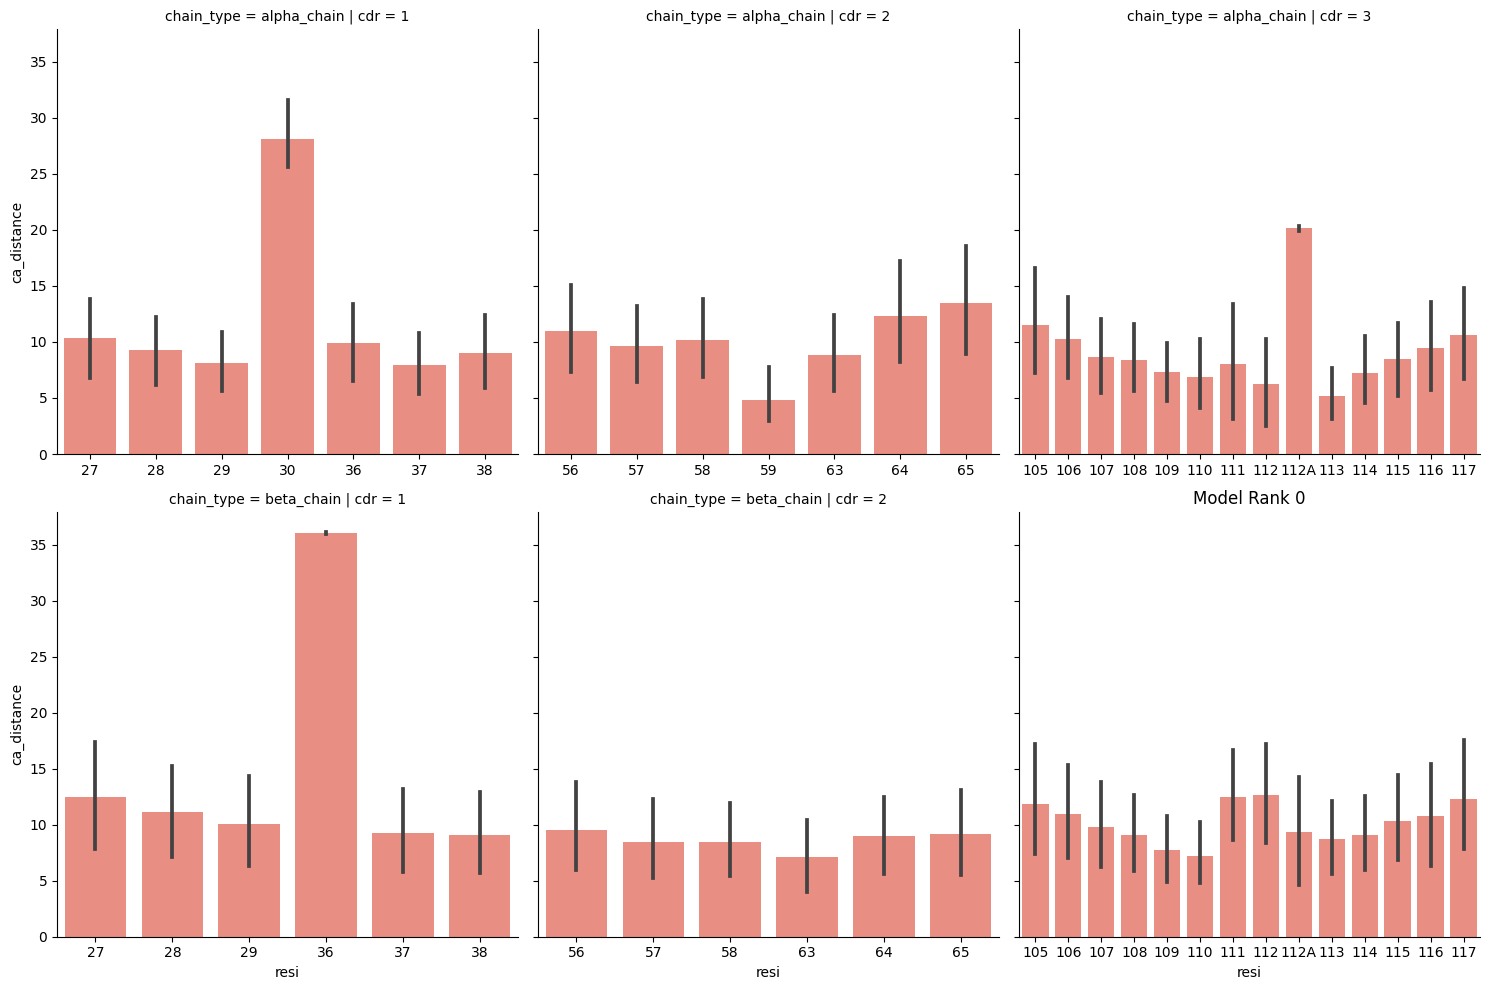

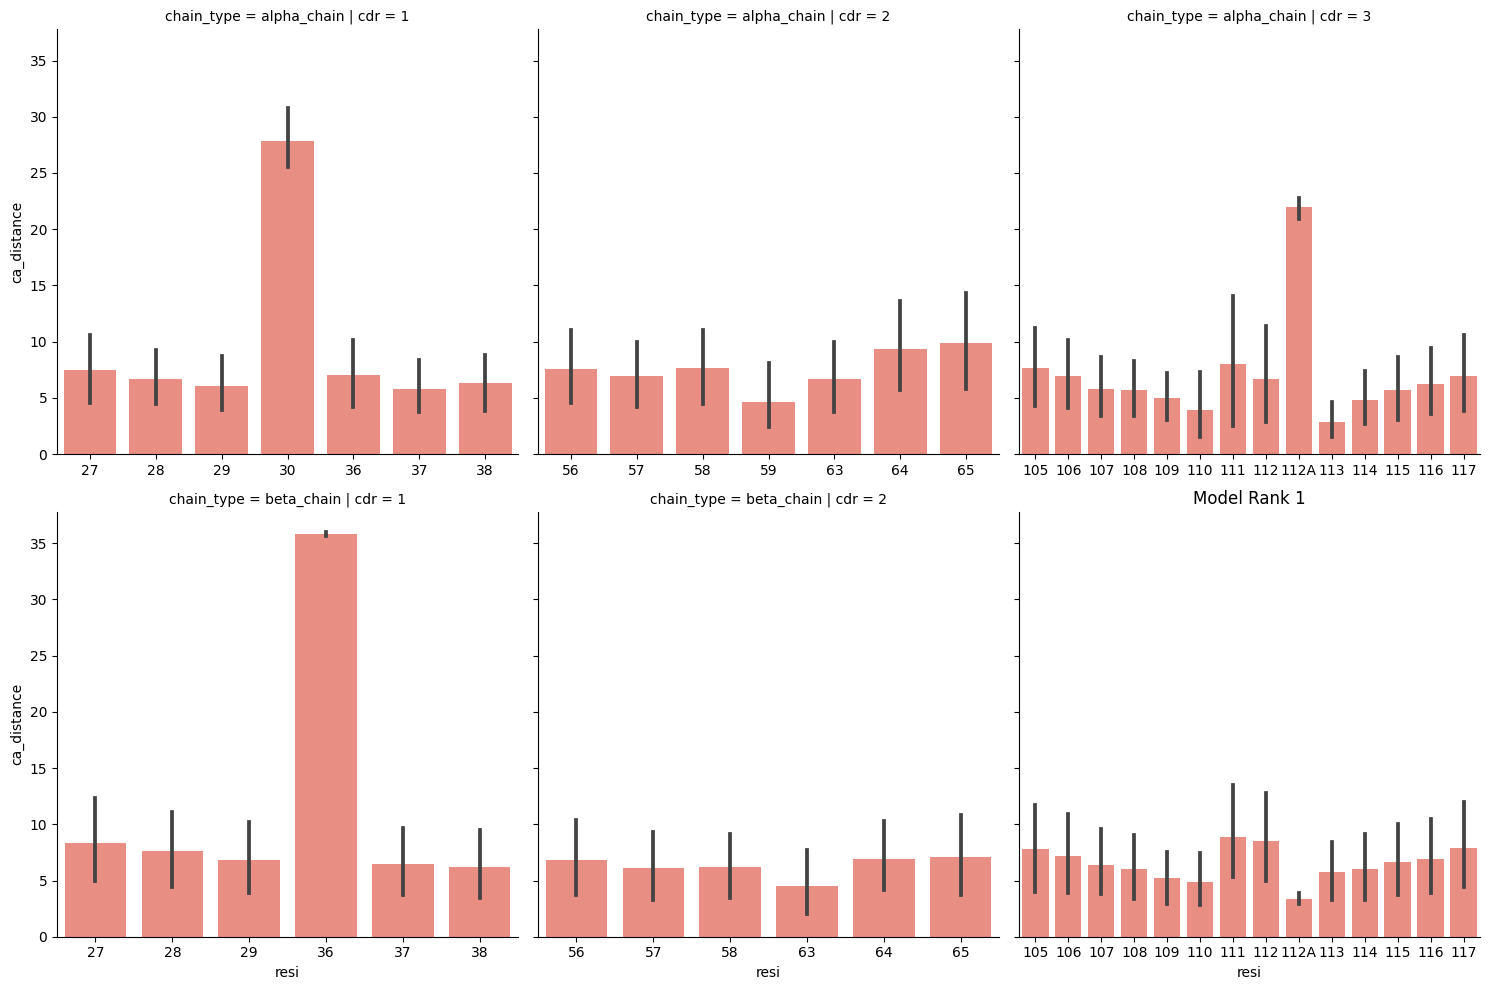

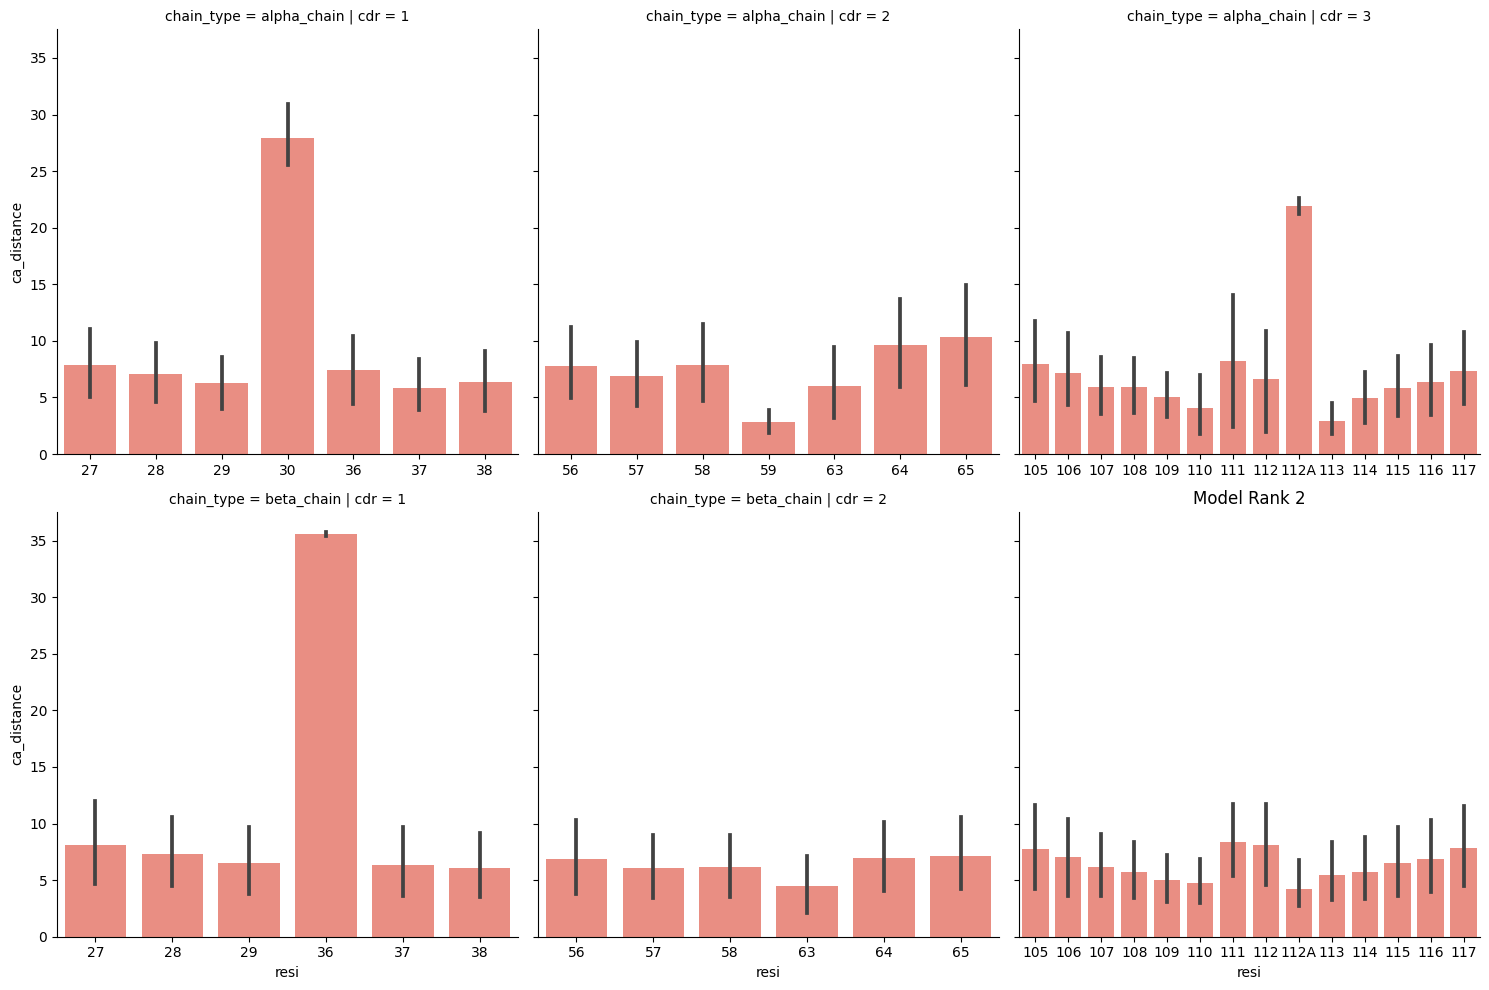

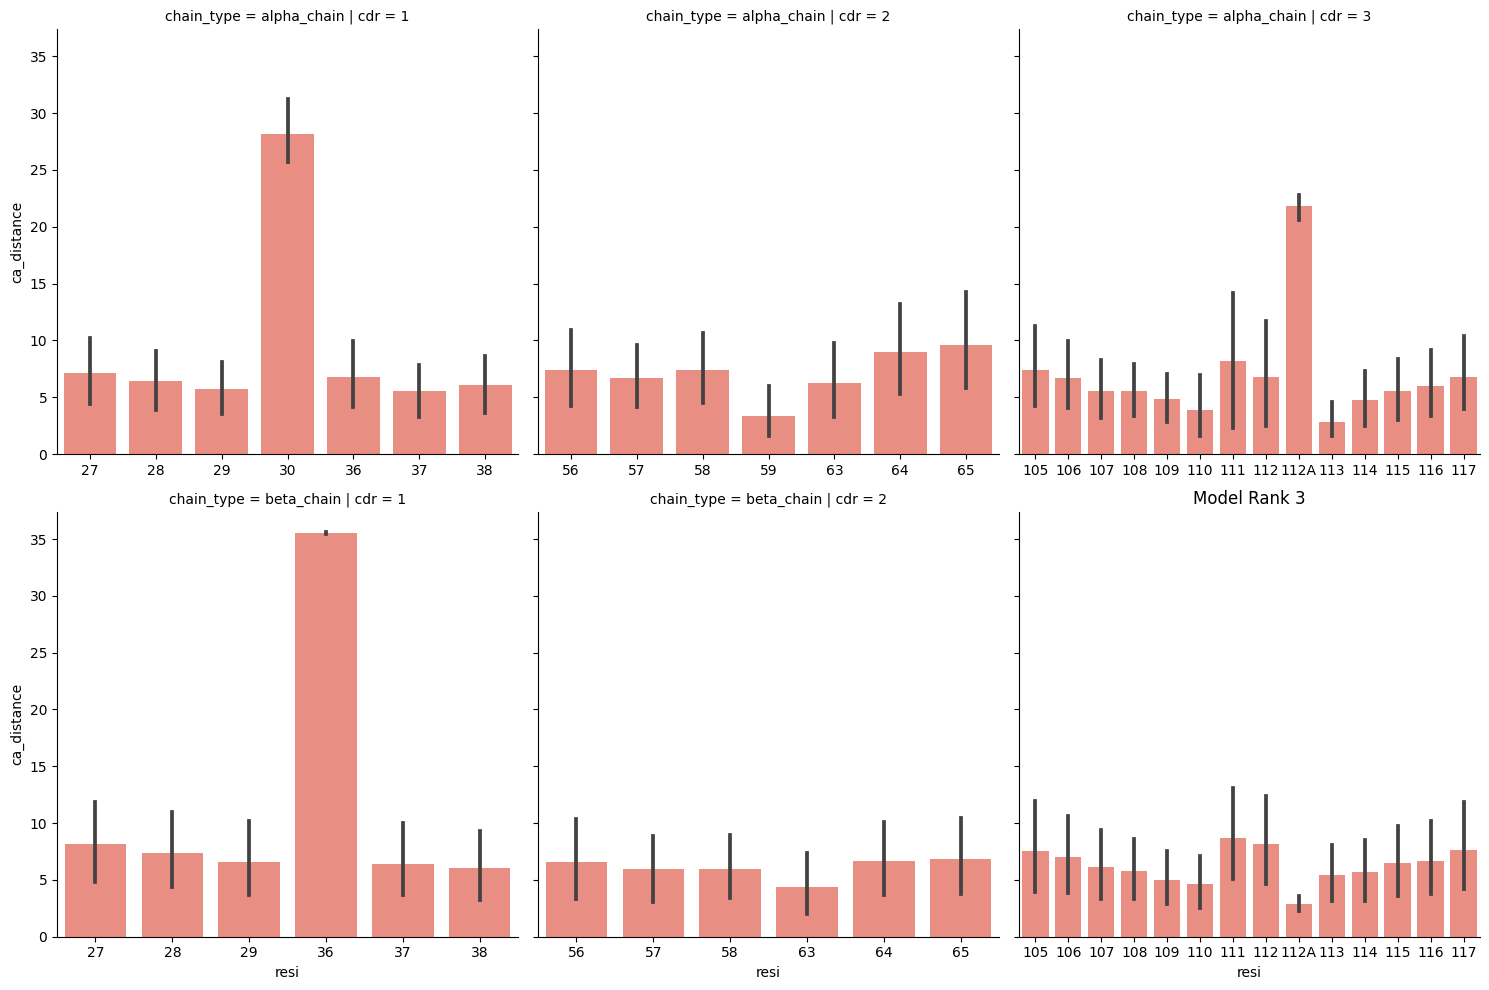

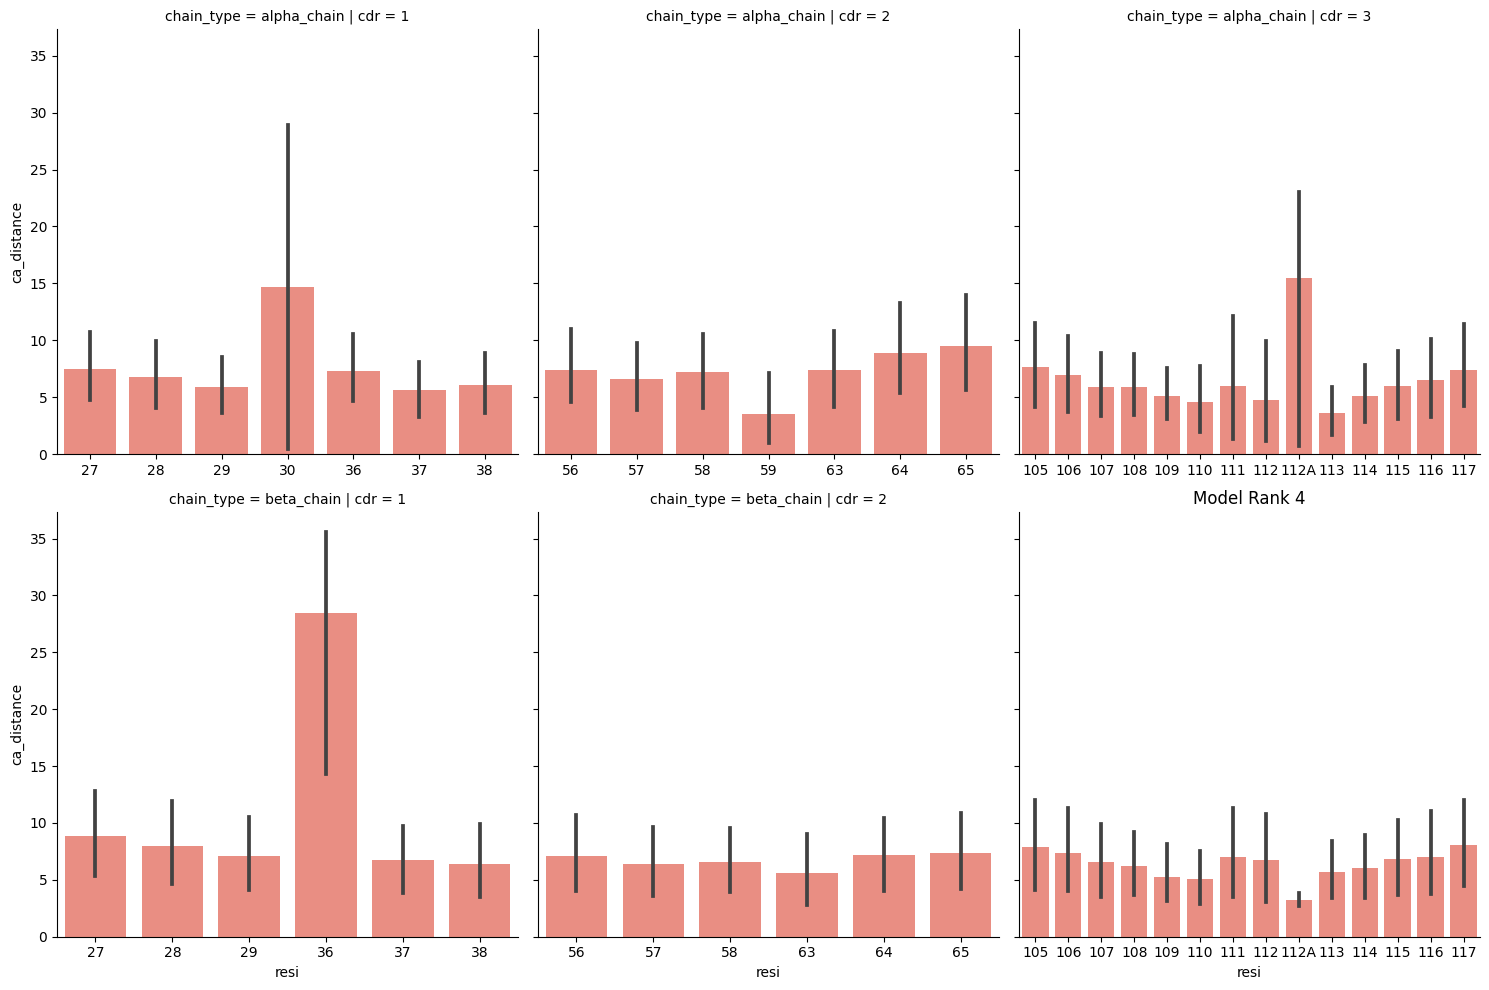

In [16]:
for model_rank in range(5):
    sns.catplot(apo_holo_ca.query('model_rank == @model_rank').sort_values('resi'),
                x='resi', y='ca_distance',
                row='chain_type', col='cdr',
                color='salmon',
                sharex=False,
                kind='bar')
    plt.title(f'Model Rank {model_rank}')

## Residue RMSD difference

In [18]:
groups = []
struct1s = []
struct2s = []
cdrs = []
chain_types = []
residue_names = []
residue_seq_ids = []
residue_insert_codes = []
rmsds = []


for group in os.listdir(DATA_DIR):
    pdb_files = [file for file in os.listdir(os.path.join(DATA_DIR, group)) if file.endswith('.pdb')]
    
    for path1, path2 in itertools.combinations(pdb_files, 2):
        
        # Load Structures
        with open(os.path.join(DATA_DIR, group, path1), 'r') as fh:
            structure1_df = parse_pdb(fh.read(), silent=True).to_pandas()
        
        with open(os.path.join(DATA_DIR, group, path2), 'r') as fh:
            structure2_df = parse_pdb(fh.read(), silent=True).to_pandas()
        
        # Annotate records
        structure1_df['chain_type'] = structure1_df['chain_id'].map(lambda chain_id: CHAIN_ANNOTATIONS[chain_id])
        structure2_df['chain_type'] = structure2_df['chain_id'].map(lambda chain_id: CHAIN_ANNOTATIONS[chain_id])
        
        structure1_df['cdr'] = structure1_df['residue_seq_id'].map(assign_cdr_number)
        structure2_df['cdr'] = structure2_df['residue_seq_id'].map(assign_cdr_number)
        
        # Query desired residues/atoms
        for chain_type, cdr_number in itertools.product(['alpha_chain', 'beta_chain'], [1, 2, 3]):
            struct_1_cdr = structure1_df.query("cdr == @cdr_number and chain_type == @chain_type")
            struct_2_cdr = structure2_df.query("cdr == @cdr_number and chain_type == @chain_type")
            
            # Compute RMSD for between every residue
            cdr_rmsds = []
            cdr_residue_names = []
            cdr_seq_ids = []
            cdr_insert_codes = []
            
            group1 = struct_1_cdr.groupby(['residue_name', 'residue_seq_id', 'residue_insert_code'], dropna=False)
            group2 = struct_2_cdr.groupby(['residue_name', 'residue_seq_id', 'residue_insert_code'], dropna=False)
            
            for ((res_name, seq_id, insert_code), res1), (_, res2) in zip(group1, group2):
                try:
                    cdr_rmsds.append(rmsd(get_coords(res1), get_coords(res2)))
                except ValueError:
                    print('Mismatched number of atoms in residue:')
                    print(path1, path2, res_name, seq_id, insert_code)
                    continue
                
                cdr_residue_names.append(res_name)
                cdr_seq_ids.append(seq_id)
                cdr_insert_codes.append(insert_code)
                
            # append values to lists
            num_residues = len(cdr_rmsds)
            
            residue_names += cdr_residue_names
            residue_seq_ids += cdr_seq_ids
            residue_insert_codes += cdr_insert_codes
            
            rmsds += cdr_rmsds
            
            groups += [group] * num_residues
            struct1s += [path1] * num_residues
            struct2s += [path2] * num_residues
            
            cdrs += [cdr_number] * num_residues
            chain_types += [chain_type] * num_residues


results_rmsd = pd.DataFrame({
    'group': groups,
    'struct1': struct1s,
    'struct2': struct2s,
    'cdr': cdrs,
    'chain_type': chain_types,
    'residue_name': residue_names,
    'residue_seq_id': residue_seq_ids,
    'residue_insert_code': residue_insert_codes,
    'rmsd': rmsds,
})
results_rmsd

,group,struct1,struct2,cdr,chain_type,residue_name,residue_seq_id,residue_insert_code,rmsd
0,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,ALA,29,NaN,20.421170
1,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,ASN,27,NaN,24.727784
2,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,GLN,37,NaN,15.228438
3,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,SER,28,NaN,27.884440
4,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,SER,36,NaN,19.160792
...,...,...,...,...,...,...,...,...,...
183685,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,PHE,117,NaN,18.725130
183686,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,SER,106,NaN,12.524080
183687,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,SER,112,NaN,20.087932
183688,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,TYR,108,NaN,16.961002


In [19]:
results_rmsd['resi'] = results_rmsd['residue_seq_id'].apply(str) + results_rmsd['residue_insert_code'].fillna('')

results_rmsd['struct_1_form'] = results_rmsd['struct1'].map(lambda path: path.split('.')[0].split('_')[2])
results_rmsd['struct_2_form'] = results_rmsd['struct2'].map(lambda path: path.split('.')[0].split('_')[2])

results_rmsd['struct_1_model_rank'] = results_rmsd['struct1'].map(lambda path: int(path.split('.')[0].split('_')[-1]))
results_rmsd['struct_2_model_rank'] = results_rmsd['struct2'].map(lambda path: int(path.split('.')[0].split('_')[-1]))

results_rmsd

,group,struct1,struct2,cdr,chain_type,residue_name,residue_seq_id,residue_insert_code,rmsd,resi,struct_1_form,struct_2_form,struct_1_model_rank,struct_2_model_rank
0,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,ALA,29,NaN,20.421170,29,holo,holo,2,0
1,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,ASN,27,NaN,24.727784,27,holo,holo,2,0
2,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,GLN,37,NaN,15.228438,37,holo,holo,2,0
3,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,SER,28,NaN,27.884440,28,holo,holo,2,0
4,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,SER,36,NaN,19.160792,36,holo,holo,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183685,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,PHE,117,NaN,18.725130,117,apo,holo,0,3
183686,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,SER,106,NaN,12.524080,106,apo,holo,0,3
183687,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,SER,112,NaN,20.087932,112,apo,holo,0,3
183688,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,TYR,108,NaN,16.961002,108,apo,holo,0,3


In [20]:
apo_holo_rmsd = results_rmsd.query("(struct_1_form != struct_2_form) and (struct_1_model_rank == struct_2_model_rank)").copy()
apo_holo_rmsd['model_rank'] = apo_holo_rmsd['struct_1_model_rank']
apo_holo_rmsd

,group,struct1,struct2,cdr,chain_type,residue_name,residue_seq_id,residue_insert_code,rmsd,resi,struct_1_form,struct_2_form,struct_1_model_rank,struct_2_model_rank,model_rank
94,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vth_DE_apo_ranked_2.pdb,1,alpha_chain,ALA,29,NaN,30.221389,29,holo,apo,2,2,2
95,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vth_DE_apo_ranked_2.pdb,1,alpha_chain,ASN,27,NaN,36.022270,27,holo,apo,2,2,2
96,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vth_DE_apo_ranked_2.pdb,1,alpha_chain,GLN,37,NaN,29.852115,37,holo,apo,2,2,2
97,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vth_DE_apo_ranked_2.pdb,1,alpha_chain,SER,28,NaN,35.444753,28,holo,apo,2,2,2
98,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vth_DE_apo_ranked_2.pdb,1,alpha_chain,SER,36,NaN,35.341258,36,holo,apo,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183501,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dxa_DECA_holo_ranked_0.pdb,3dx9_AB_apo_ranked_0.pdb,3,beta_chain,PHE,117,NaN,18.134814,117,holo,apo,0,0,0
183502,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dxa_DECA_holo_ranked_0.pdb,3dx9_AB_apo_ranked_0.pdb,3,beta_chain,SER,106,NaN,12.231716,106,holo,apo,0,0,0
183503,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dxa_DECA_holo_ranked_0.pdb,3dx9_AB_apo_ranked_0.pdb,3,beta_chain,SER,112,NaN,20.618247,112,holo,apo,0,0,0
183504,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dxa_DECA_holo_ranked_0.pdb,3dx9_AB_apo_ranked_0.pdb,3,beta_chain,TYR,108,NaN,16.500131,108,holo,apo,0,0,0


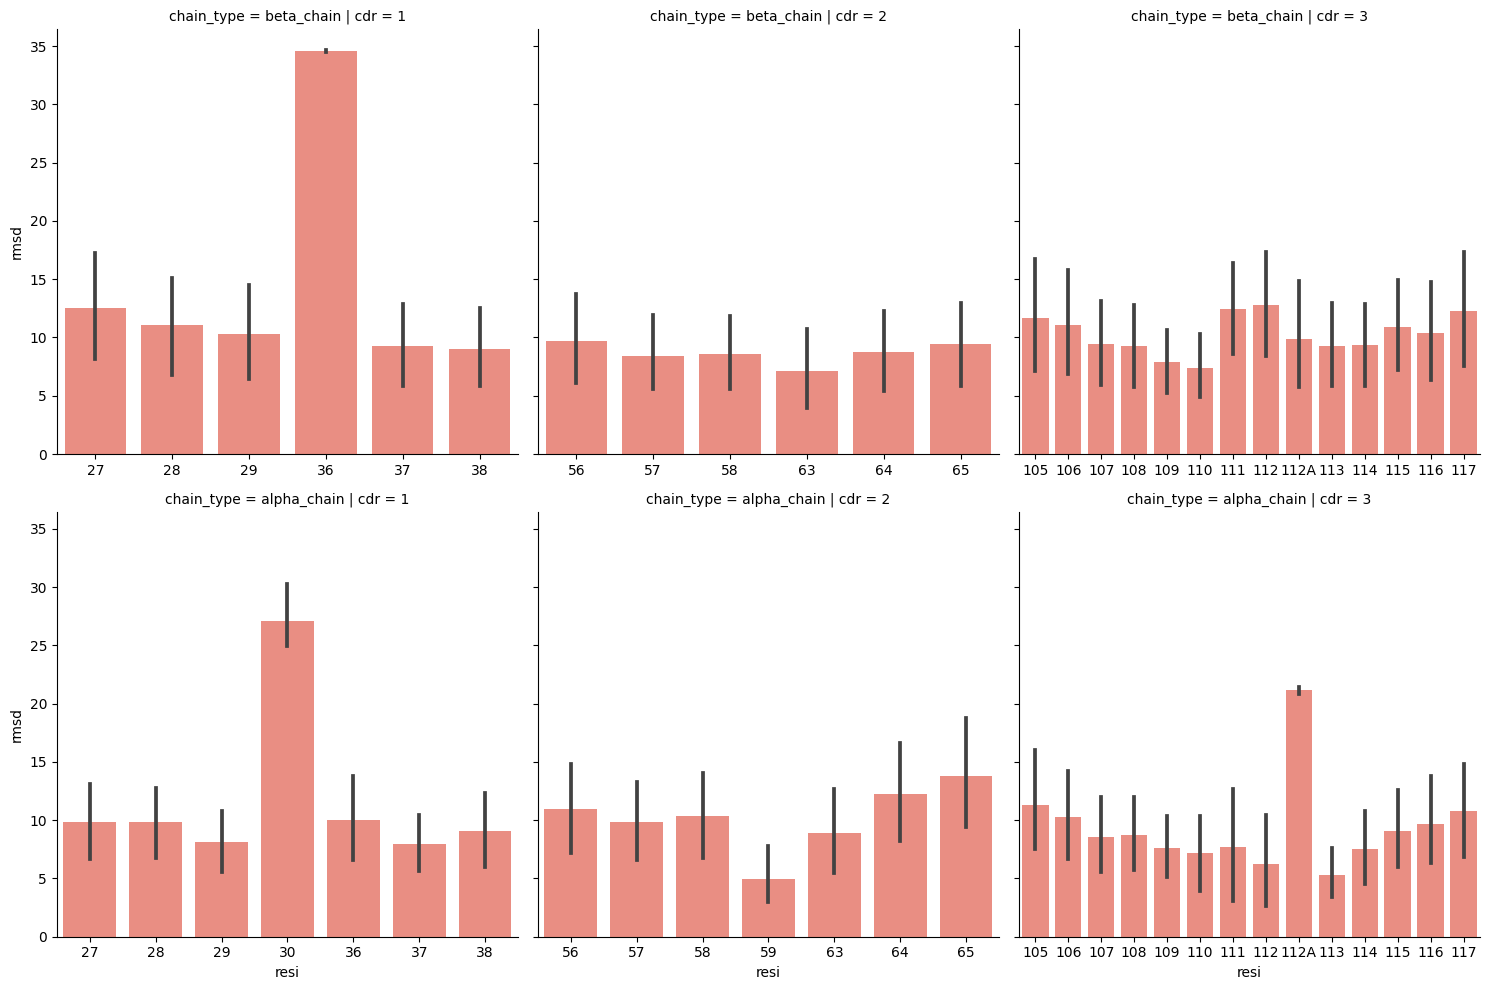

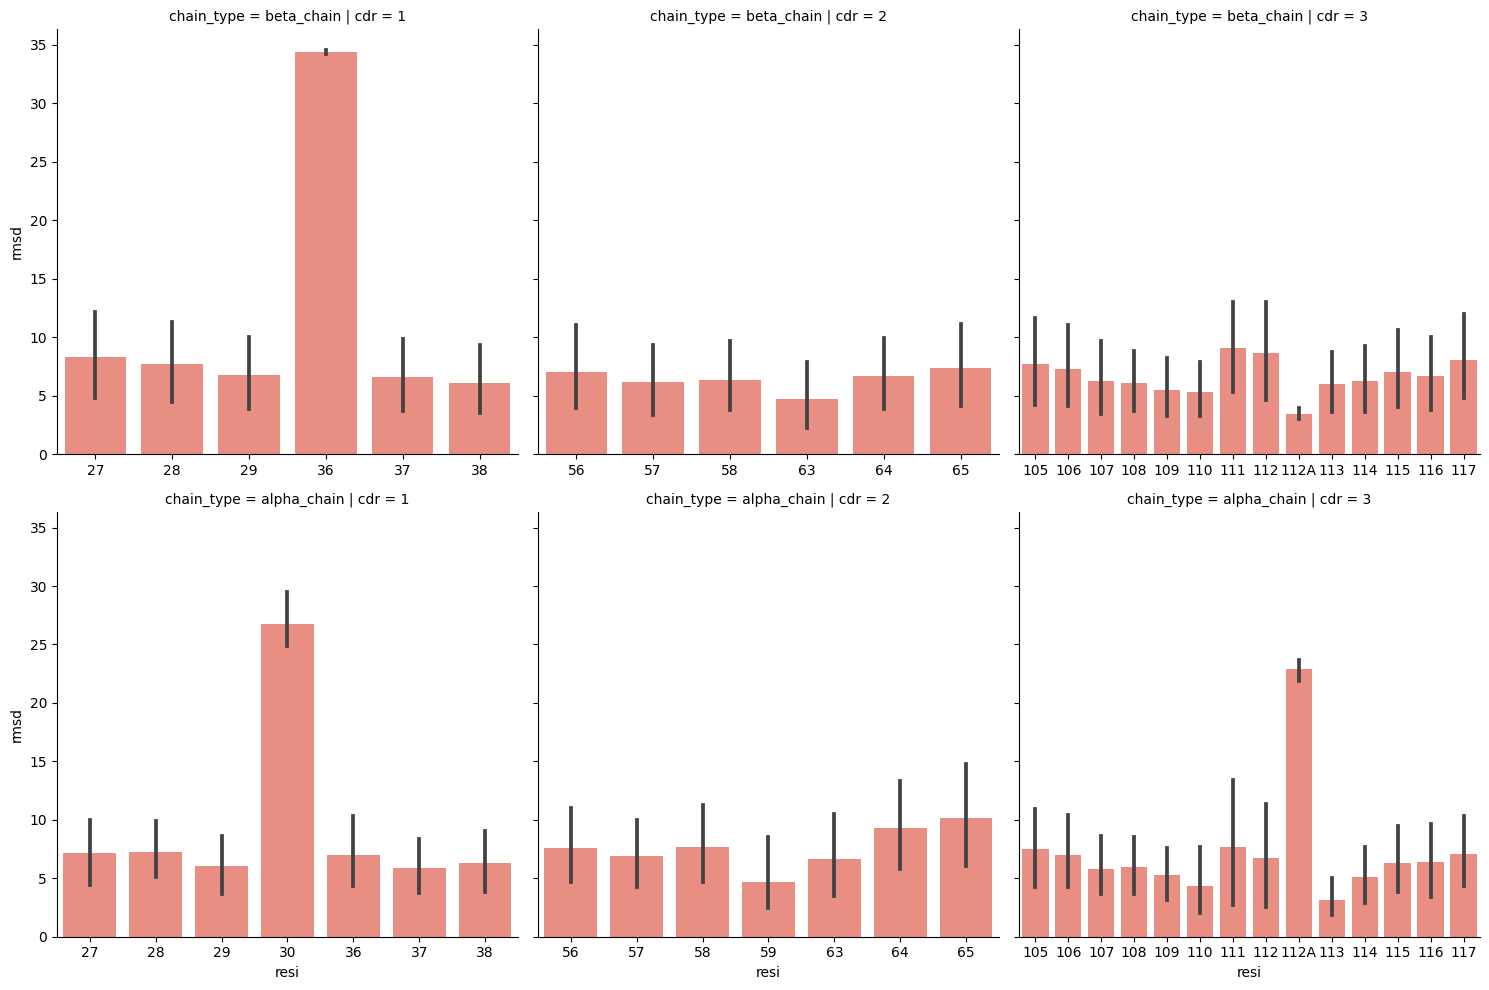

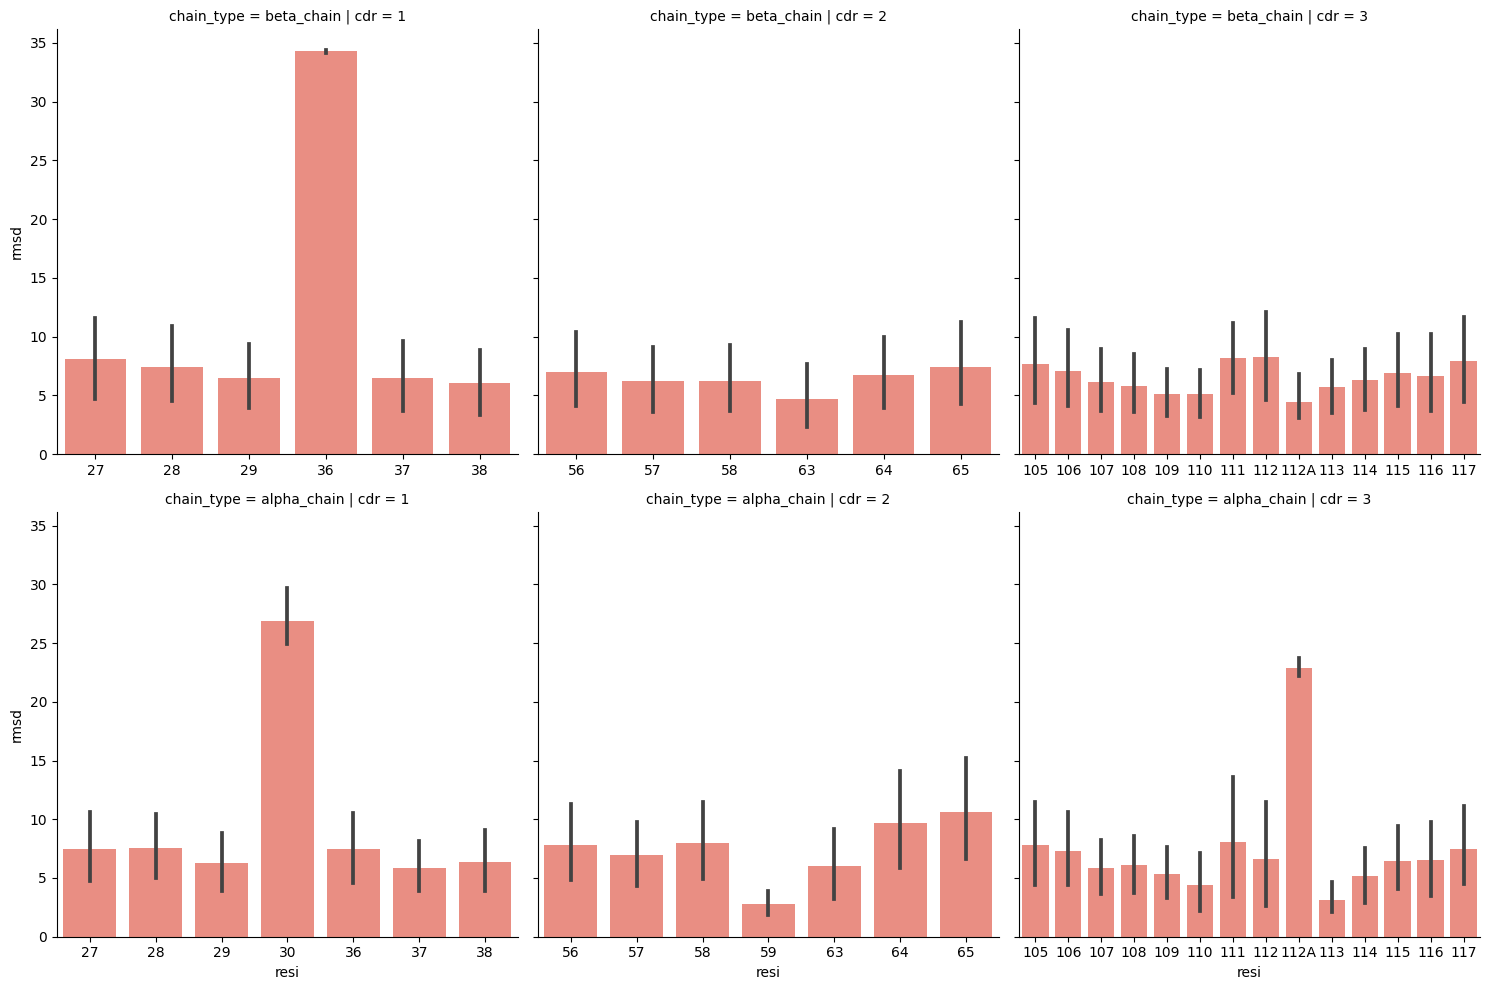

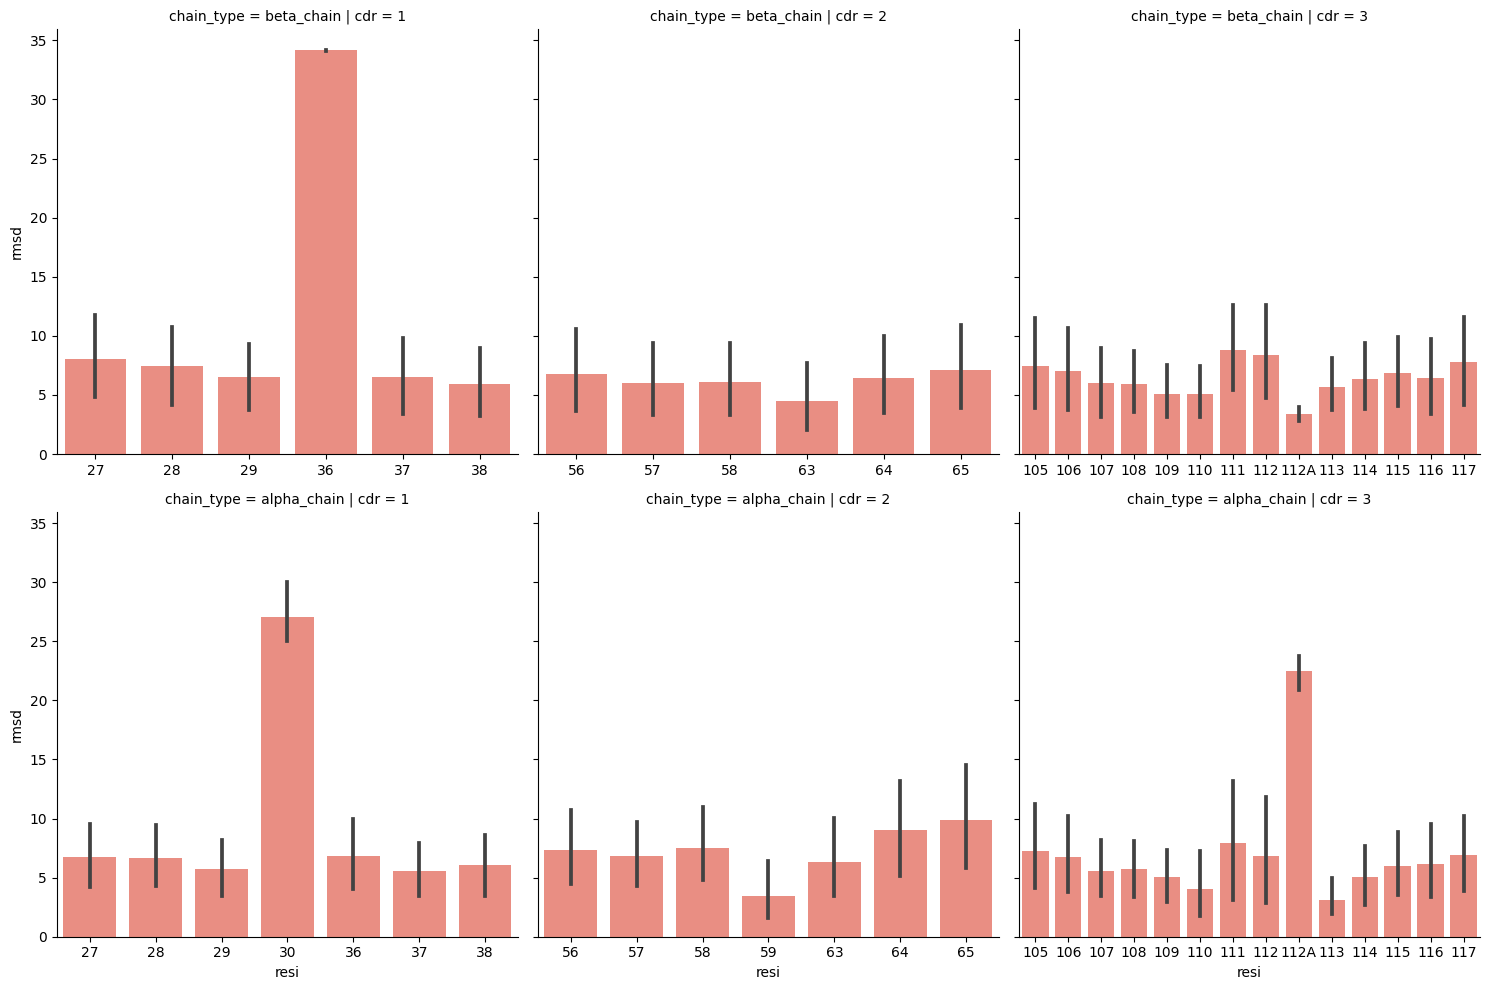

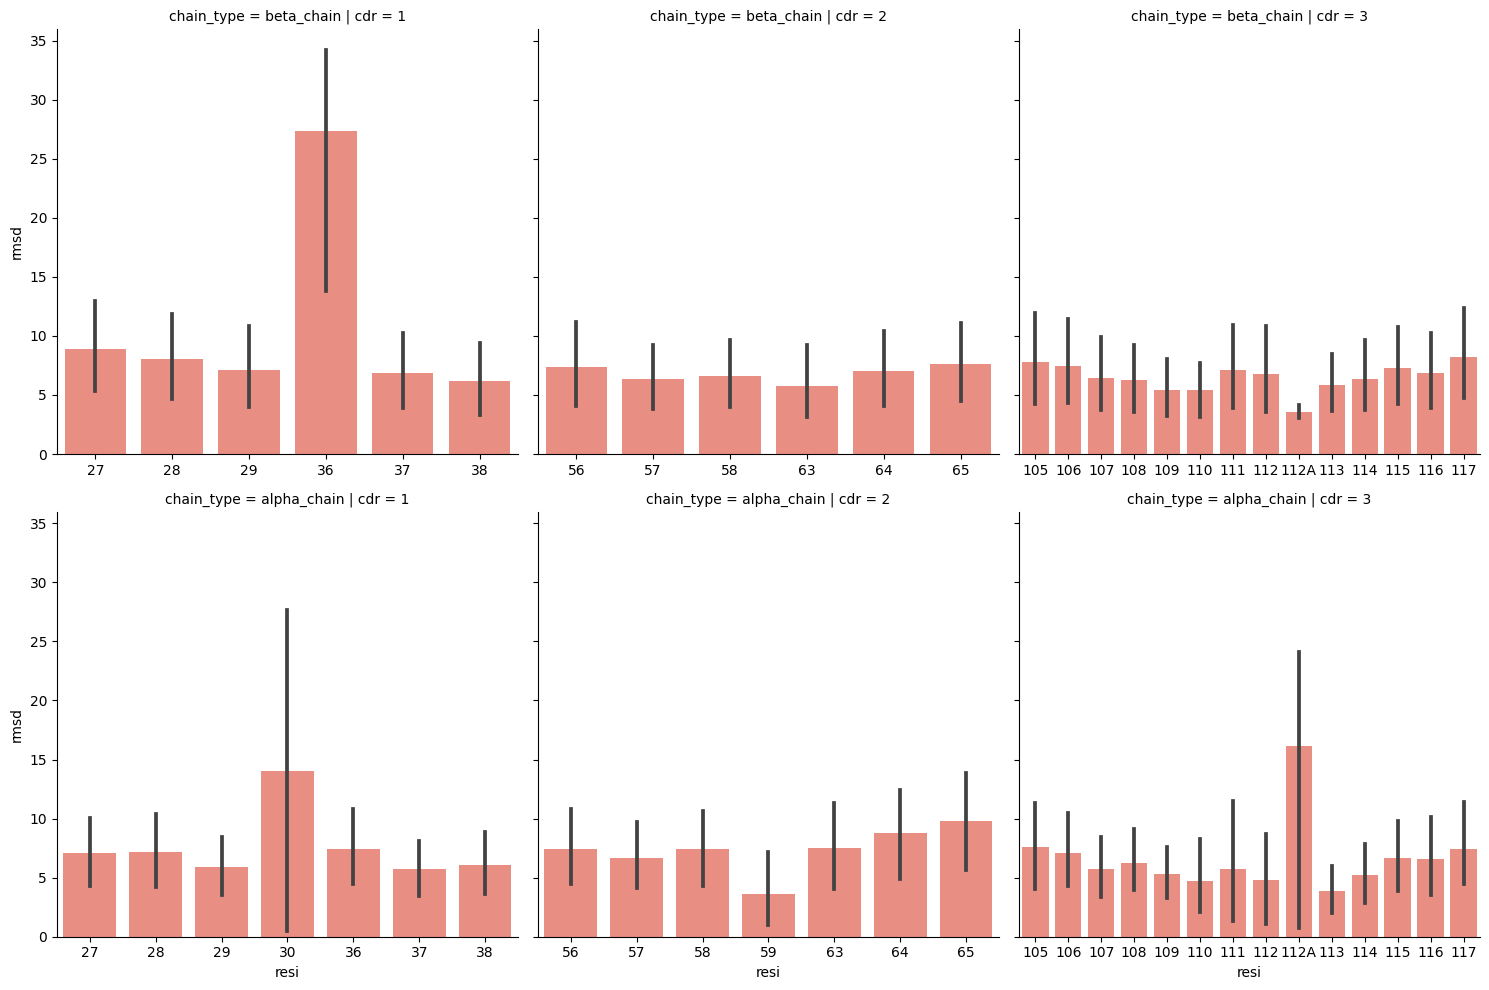

In [23]:
for model_rank in range(5):
    sns.catplot(apo_holo_rmsd.query('model_rank == @model_rank').sort_values('resi'),
                x='resi', y='rmsd',
                row='chain_type', col='cdr',
                color='salmon',
                sharex=False,
                kind='bar')

# Meseasuring differences in $\chi$-angles

Do the side chains change conformation as well?

In [24]:
CHI_ATOMS = pd.read_csv('chi-angles.csv', index_col='tlc')

def measure_chi_angle(residue_df: pd.DataFrame) -> float:
    res_name = residue_df.iloc[0]['residue_name']
    chi_atoms = CHI_ATOMS.loc[res_name][['atom_1', 'atom_2', 'atom_3', 'atom_4']].to_list()
    
    atom_positions = [residue_df.query("atom_name == @atom")[['pos_x', 'pos_y', 'pos_z']].iloc[0].to_numpy() for atom in chi_atoms]
    
    b1 = atom_positions[1] - atom_positions[0]
    b2 = atom_positions[2] - atom_positions[1]
    b3 = atom_positions[3] - atom_positions[1]
    
    b1_norm = b1 / np.linalg.norm(b1)
    b2_norm = b2 / np.linalg.norm(b2)
    b3_norm = b3 / np.linalg.norm(b3)
    
    n1 = np.cross(b1_norm, b2_norm)
    n2 = np.cross(b2_norm, b3_norm)
    
    m1 = np.cross(n1, b2_norm)
    
    x = np.dot(n1, n2)
    y = np.dot(m1, n2)
    
    return np.arctan2(x, y)

In [25]:
groups = []
struct1s = []
struct2s = []
cdrs = []
chain_types = []
residue_names = []
residue_seq_ids = []
residue_insert_codes = []
chi_angle_changes = []


for group in os.listdir(DATA_DIR):
    print(group)
    pdb_files = [file for file in os.listdir(os.path.join(DATA_DIR, group)) if file.endswith('.pdb')]

    for path1, path2 in itertools.combinations(pdb_files, 2):
        print(path1, path2)
        
        # Load Structures
        with open(os.path.join(DATA_DIR, group, path1), 'r') as fh:
            structure1_df = parse_pdb(fh.read(), silent=True).to_pandas()
        
        with open(os.path.join(DATA_DIR, group, path2), 'r') as fh:
            structure2_df = parse_pdb(fh.read(), silent=True).to_pandas()
        
        # Annotate records
        structure1_df['chain_type'] = structure1_df['chain_id'].map(lambda chain_id: CHAIN_ANNOTATIONS[chain_id])
        structure2_df['chain_type'] = structure2_df['chain_id'].map(lambda chain_id: CHAIN_ANNOTATIONS[chain_id])
        
        structure1_df['cdr'] = structure1_df['residue_seq_id'].map(assign_cdr_number)
        structure2_df['cdr'] = structure2_df['residue_seq_id'].map(assign_cdr_number)
        
        # Query desired residues/atoms
        for chain_type, cdr_number in itertools.product(['alpha_chain', 'beta_chain'], [1, 2, 3]):
            print(cdr_number, chain_type)
            
            struct_1_cdr = structure1_df.query("cdr == @cdr_number and chain_type == @chain_type")
            struct_2_cdr = structure2_df.query("cdr == @cdr_number and chain_type == @chain_type")
            
            # Compute RMSD for between every residue
            cdr_angle_changes = []
            cdr_residue_names = []
            cdr_seq_ids = []
            cdr_insert_codes = []
            
            group1 = struct_1_cdr.groupby(['residue_name', 'residue_seq_id', 'residue_insert_code'], dropna=False)
            group2 = struct_2_cdr.groupby(['residue_name', 'residue_seq_id', 'residue_insert_code'], dropna=False)
            
            for ((res_name, seq_id, insert_code), res1), (_, res2) in zip(group1, group2):
                if res_name == 'GLY' or res_name == 'ALA':
                    cdr_angle_changes.append(None)
                else:
                    try:
                        cdr_angle_changes.append(measure_chi_angle(res1) - measure_chi_angle(res2))
                    except IndexError:
                        print('Missing atoms needed to calculate chi angle:')
                        print(path1, path2, res_name, seq_id, insert_code)
                        continue
                
                cdr_residue_names.append(res_name)
                cdr_seq_ids.append(seq_id)
                cdr_insert_codes.append(insert_code)

            # append values to lists
            num_residues = len(cdr_angle_changes)
            
            residue_names += cdr_residue_names
            residue_seq_ids += cdr_seq_ids
            residue_insert_codes += cdr_insert_codes
            
            chi_angle_changes += cdr_angle_changes
            
            groups += [group] * num_residues
            struct1s += [path1] * num_residues
            struct2s += [path2] * num_residues
            
            cdrs += [cdr_number] * num_residues
            chain_types += [chain_type] * num_residues
        print()
        
results_chi = pd.DataFrame({
    'group': groups,
    'struct1': struct1s,
    'struct2': struct2s,
    'cdr': cdrs,
    'chain_type': chain_types,
    'residue_name': residue_names,
    'residue_seq_id': residue_seq_ids,
    'residue_insert_code': residue_insert_codes,
    'chi_angle_change': chi_angle_changes,
})
results_chi

AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-ATYLCVVQPGGYQKVTFGTGTK-TLQCAQDMNHNSMYWYRQD-GLRLIYYSASEGTTDKGEVPNGYNVSR-SVYFCASSEGLWQVGDEQYFGPGTR
6vrm_DEPA_holo_ranked_2.pdb 6vrm_DEPA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6vrm_DEPA_holo_ranked_2.pdb 6vrm_DEPA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6vrm_DEPA_holo_ranked_2.pdb 6vth_DE_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6vrm_DEPA_holo_ranked_2.pdb 6vth_DE_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6vrm_DEPA_holo_ranked_2.pdb 6vth_DE_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6vrm_DEPA_holo_ranked_2.pdb 6vrm_DEPA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6vrm_DEPA_holo_ranked_2.pdb 6vth_DE_apo_

2 beta_chain
3 beta_chain

4jfh_DE_apo_ranked_2.pdb 6eqb_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfh_DE_apo_ranked_2.pdb 4jff_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfh_DE_apo_ranked_2.pdb 4jff_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfh_DE_apo_ranked_2.pdb 4jfe_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfh_DE_apo_ranked_2.pdb 4jfd_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfh_DE_apo_ranked_2.pdb 6tmo_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfh_DE_apo_ranked_2.pdb 4jfh_DE_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfh_DE_apo_ranked_2.pdb 4jfd_D

2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_3.pdb 6tmo_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_3.pdb 4jfh_DE_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_3.pdb 4jfd_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_3.pdb 4jfd_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_3.pdb 4jfd_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_3.pdb 6tmo_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_3.pdb 4jff_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6eqb_DECA_holo_ranked_4.pdb 6tmo_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6eqb_DECA_holo_ranked_4.pdb 4jfe_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfh_DE_apo_ranked_0.pdb 6eqb_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfh_DE_apo_ranked_0.pdb 4jfd_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfh_DE_apo_ranked_0.pdb 6eqb_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfh_DE_apo_ranked_0.pdb 4jfh_DE_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfh_DE_apo_ranked_0.pdb 6tmo_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_cha

1 beta_chain
2 beta_chain
3 beta_chain

4jfd_DECA_holo_ranked_3.pdb 6tmo_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfd_DECA_holo_ranked_3.pdb 4jfh_DE_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfd_DECA_holo_ranked_3.pdb 4jfd_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfd_DECA_holo_ranked_3.pdb 4jfd_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfd_DECA_holo_ranked_3.pdb 4jfd_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfd_DECA_holo_ranked_3.pdb 6tmo_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfd_DECA_holo_ranked_3.pdb 4jff_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chai

2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_4.pdb 6tmo_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_4.pdb 4jfh_DE_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_4.pdb 4jfd_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_4.pdb 4jfd_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_4.pdb 4jfd_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_4.pdb 6tmo_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_4.pdb 4jff_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_

3 beta_chain

4jfe_DECA_holo_ranked_3.pdb 6tmo_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfe_DECA_holo_ranked_3.pdb 4jfe_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6eqb_DECA_holo_ranked_1.pdb 4jff_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6eqb_DECA_holo_ranked_1.pdb 4jff_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6eqb_DECA_holo_ranked_1.pdb 4jfe_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6eqb_DECA_holo_ranked_1.pdb 4jfd_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6eqb_DECA_holo_ranked_1.pdb 6tmo_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6eqb_DECA_holo_ranke

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfd_DECA_holo_ranked_0.pdb 4jfd_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfd_DECA_holo_ranked_0.pdb 6tmo_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfd_DECA_holo_ranked_0.pdb 4jff_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfd_DECA_holo_ranked_0.pdb 4jff_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfd_DECA_holo_ranked_0.pdb 4jff_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfd_DECA_holo_ranked_0.pdb 6tmo_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jfd_DECA_holo_ranked_0.pdb 4jfe_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alph

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

4jff_DECA_holo_ranked_2.pdb 4jfe_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6tmo_DECA_holo_ranked_1.pdb 4jfe_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

SLNCTYSNSAFQYFMWYRQY-GPELLMYTYSSGNKEDGRFTAQV-ATYLCAMRGDSSYKLIFGSGTR-TLRCKPISGHDYLFWYRQT-GLELLIYFNNNVPIDDSGMPEDRFSAKM-AVYFCASSLWEKLAKNIQYFGAGTR
SLNCTYSDRGSQSFFWYRQY-SPELIMFIYSNGDKEDGRFTAQL-ATYLCAVNFGGGKLIFGQGTE-TLRCTQDMRHNAMYWYRQD-GLRLIHYSNTAGTTGKGEVPDGYSVSR-SVYFCASSLSFGTEAFFGQGTR
6amu_DECA_holo_ranked_0.pdb 3qdj_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6amu_DECA_holo_ranked_0.pdb 3qdg_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6amu_DECA_holo_ranked_0.pdb 3qdg_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdg_DECA_holo_ranked_4.pdb 6am5_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdg_DECA_holo_ranked_4.pdb 3qdj_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdg_DECA_holo_ranked_4.pdb 6am5_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdg_DECA_holo_ranked_4.pdb 6amu_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdg_DECA_holo_ranked_4.pdb 3qdj_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdg_DECA_holo_ranked_4.pdb 6amu_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdg_DECA_holo_ranked_4.pdb 3qeu_DE_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_c

1 beta_chain
2 beta_chain
3 beta_chain

3qeu_DE_apo_ranked_0.pdb 6am5_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qeu_DE_apo_ranked_0.pdb 3qdj_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qeu_DE_apo_ranked_0.pdb 6am5_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qeu_DE_apo_ranked_0.pdb 6amu_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qeu_DE_apo_ranked_0.pdb 3qdj_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qeu_DE_apo_ranked_0.pdb 6amu_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qeu_DE_apo_ranked_0.pdb 3qeu_DE_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qeu_DE_apo_ranked

2 beta_chain
3 beta_chain

3qdg_DECA_holo_ranked_2.pdb 6am5_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdg_DECA_holo_ranked_2.pdb 6amu_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdg_DECA_holo_ranked_2.pdb 3qdg_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdg_DECA_holo_ranked_2.pdb 6am5_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdj_DECA_holo_ranked_3.pdb 3qdg_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdj_DECA_holo_ranked_3.pdb 6am5_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdj_DECA_holo_ranked_3.pdb 6am5_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdj_DE

1 beta_chain
2 beta_chain
3 beta_chain

3qdj_DECA_holo_ranked_1.pdb 3qdj_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdj_DECA_holo_ranked_1.pdb 6amu_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdj_DECA_holo_ranked_1.pdb 3qeu_DE_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdj_DECA_holo_ranked_1.pdb 3qeu_DE_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdj_DECA_holo_ranked_1.pdb 3qeu_DE_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdj_DECA_holo_ranked_1.pdb 6am5_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdj_DECA_holo_ranked_1.pdb 6amu_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qd


6am5_DECA_holo_ranked_0.pdb 6am5_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6amu_DECA_holo_ranked_4.pdb 3qdg_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6amu_DECA_holo_ranked_4.pdb 6am5_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qdg_DECA_holo_ranked_3.pdb 6am5_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

SLNCTYSDRGSQSFFWYRQY-SPELIMFIYSNGDKEDGRFTAQL-ATYLCAVRTNSGYALNFGKGTS-TLRCSPKQGHDTVSWYQQA-GPQFIFQYYEEEERQRGNFPDRFSGHQ-ALYLCASSDTVSYEQYFGPGTR
5nmd_CD_apo_ranked_2.pdb 5nmg_IJHF_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nmd_CD_apo_ranked_2.pdb 5nmd_CD_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nmd_CD_apo_ranked_2.pdb 5nmf_DECA_holo_r

1 beta_chain
2 beta_chain
3 beta_chain

5nmf_DECA_holo_ranked_3.pdb 5nmg_IJHF_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nmf_DECA_holo_ranked_3.pdb 5nmg_IJHF_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nmf_DECA_holo_ranked_3.pdb 5nme_IJHF_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nmf_DECA_holo_ranked_3.pdb 5nmd_CD_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nmf_DECA_holo_ranked_3.pdb 5nmf_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nmf_DECA_holo_ranked_3.pdb 5nmg_IJHF_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nmf_DECA_holo_ranked_3.pdb 5nmf_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chai

1 beta_chain
2 beta_chain
3 beta_chain

5nmg_IJHF_holo_ranked_3.pdb 5nmf_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nmg_IJHF_holo_ranked_3.pdb 5nmf_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nmg_IJHF_holo_ranked_3.pdb 5nme_IJHF_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nmg_IJHF_holo_ranked_3.pdb 5nme_IJHF_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nmg_IJHF_holo_ranked_3.pdb 5nmf_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nmg_IJHF_holo_ranked_3.pdb 5nme_IJHF_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nmg_IJHF_holo_ranked_3.pdb 5nmg_IJHF_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_c

2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nme_IJHF_holo_ranked_1.pdb 5nmf_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nme_IJHF_holo_ranked_1.pdb 5nme_IJHF_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nme_IJHF_holo_ranked_1.pdb 5nmg_IJHF_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nme_IJHF_holo_ranked_1.pdb 5nmd_CD_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nme_IJHF_holo_ranked_4.pdb 5nmf_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nme_IJHF_holo_ranked_4.pdb 5nme_IJHF_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5nme_IJHF_holo_ranked_4.pdb 5nmg_IJHF_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_ch

1 beta_chain
2 beta_chain
3 beta_chain

3vxr_DECA_holo_ranked_4.pdb 3vxr_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxr_DECA_holo_ranked_4.pdb 3vxs_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxr_DECA_holo_ranked_4.pdb 3vxq_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxr_DECA_holo_ranked_4.pdb 3vxs_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxr_DECA_holo_ranked_4.pdb 3vxs_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxs_DECA_holo_ranked_3.pdb 3vxq_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxs_DECA_holo_ranked_3.pdb 3vxq_AB_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vx


SLNCTYSDRGSQSFFWYRQY-SPELIMFIYSNGDKEDGRFTAQL-ATYLCAVNRDDKIIFGKGTR-TFRCDPISEHNRLYWYRQT-GPEFLTYFQNEAQLEKSRLLSDRFSAER-AMYLCASSPDIEQYFGPGTR
7n1f_DECA_holo_ranked_4.pdb 7n1d_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1f_DECA_holo_ranked_4.pdb 7n1f_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1f_DECA_holo_ranked_4.pdb 7n1f_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1f_DECA_holo_ranked_4.pdb 7rtr_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1f_DECA_holo_ranked_4.pdb 7n1d_AB_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1f_DECA_holo_ranked_4.pdb 7rtr_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1f_DECA_holo_ranked_4.pdb 7n1d_AB_apo_r

2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1d_AB_apo_ranked_1.pdb 7rtr_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1d_AB_apo_ranked_1.pdb 7n1d_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1d_AB_apo_ranked_1.pdb 7n1f_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1d_AB_apo_ranked_1.pdb 7n1d_AB_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1d_AB_apo_ranked_1.pdb 7rtr_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1d_AB_apo_ranked_1.pdb 7rtr_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1d_AB_apo_ranked_1.pdb 7n1f_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_

2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_1.pdb 3qfj_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_1.pdb 3qfj_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_1.pdb 1qsf_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_1.pdb 1qse_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_1.pdb 3qh3_AB_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_1.pdb 3d39_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_1.pdb 7amp_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_hol

1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_4.pdb 3d39_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_4.pdb 1qsf_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_4.pdb 7amp_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_4.pdb 3qfj_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_4.pdb 1ao7_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_4.pdb 1ao7_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qse_DECA_holo_ranked_4.pdb 3d3v_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chai

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_4.pdb 1ao7_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_4.pdb 3qfj_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_4.pdb 1qsf_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_4.pdb 3d3v_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_4.pdb 3qh3_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_4.pdb 1ao7_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_4.pdb 3pwp_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 b

2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_0.pdb 3pwp_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_0.pdb 1qsf_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_0.pdb 1qse_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_0.pdb 1qrn_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_0.pdb 1qse_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_0.pdb 1ao7_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_0.pdb 3qh3_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_

1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_0.pdb 1qsf_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_0.pdb 3h9s_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_0.pdb 3h9s_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_0.pdb 7amp_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_0.pdb 3d39_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_3.pdb 3d3v_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_3.pdb 3qh3_AB_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain



1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_1.pdb 3d39_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_1.pdb 3qh3_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_1.pdb 3qfj_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_1.pdb 3qfj_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_1.pdb 1qsf_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_1.pdb 1qse_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_1.pdb 3qh3_AB_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain




3qh3_AB_apo_ranked_4.pdb 1ao7_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_4.pdb 1ao7_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_4.pdb 3d3v_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_4.pdb 1qrn_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_4.pdb 3pwp_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_4.pdb 1ao7_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_4.pdb 3qfj_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_4.pdb 1qsf_DECA_holo_ranked_0.pdb
1

2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_4.pdb 1qsf_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_4.pdb 1qse_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_4.pdb 1qrn_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_4.pdb 1qse_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_4.pdb 1ao7_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_4.pdb 3qh3_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_4.pdb 3h9s_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_ch

1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_3.pdb 7amp_AB_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_3.pdb 3d39_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_3.pdb 3qh3_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_3.pdb 3qfj_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_3.pdb 3qfj_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_3.pdb 1qsf_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_3.pdb 1qse_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain



1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_0.pdb 1qrn_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_0.pdb 3pwp_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_0.pdb 1ao7_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_0.pdb 3qfj_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_0.pdb 1qsf_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_0.pdb 3d3v_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_0.pdb 3qh3_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_c

1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_1.pdb 3h9s_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_1.pdb 3d3v_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_1.pdb 3pwp_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_1.pdb 1qsf_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_1.pdb 3h9s_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_1.pdb 3h9s_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_1.pdb 7amp_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_3.pdb 1ao7_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_3.pdb 3d3v_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_3.pdb 1qrn_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_3.pdb 3pwp_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_3.pdb 1ao7_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_3.pdb 3qfj_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_3.pdb 1qsf_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain


1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_1.pdb 3d3v_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_1.pdb 3pwp_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_1.pdb 1qsf_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_1.pdb 3h9s_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_1.pdb 3h9s_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_1.pdb 7amp_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qfj_DECA_holo_ranked_1.pdb 3d39_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chai

3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qsf_DECA_holo_ranked_3.pdb 1qsf_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qsf_DECA_holo_ranked_3.pdb 3d3v_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qsf_DECA_holo_ranked_3.pdb 3qh3_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qsf_DECA_holo_ranked_3.pdb 1ao7_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qsf_DECA_holo_ranked_3.pdb 3pwp_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qsf_DECA_holo_ranked_3.pdb 3d39_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qsf_DECA_holo_ranked_3.pdb 1qrn_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_cha

1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_1.pdb 3d39_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_1.pdb 1qsf_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_1.pdb 7amp_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_1.pdb 3qfj_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_1.pdb 1ao7_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_1.pdb 1ao7_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked_1.pdb 3d3v_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3qh3_AB_apo_ranked


3d39_DECA_holo_ranked_4.pdb 3d3v_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d39_DECA_holo_ranked_4.pdb 3pwp_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d39_DECA_holo_ranked_4.pdb 1qsf_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d39_DECA_holo_ranked_4.pdb 3h9s_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d39_DECA_holo_ranked_4.pdb 3h9s_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d39_DECA_holo_ranked_4.pdb 7amp_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d39_DECA_holo_ranked_4.pdb 3d39_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_2.pdb 3d39_DECA_h

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d39_DECA_holo_ranked_1.pdb 1qse_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d39_DECA_holo_ranked_1.pdb 1ao7_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d39_DECA_holo_ranked_1.pdb 3qh3_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d39_DECA_holo_ranked_1.pdb 3h9s_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d39_DECA_holo_ranked_1.pdb 3d3v_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d39_DECA_holo_ranked_1.pdb 3pwp_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d39_DECA_holo_ranked_1.pdb 1qsf_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_c

1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_0.pdb 1qrn_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_0.pdb 1qse_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_0.pdb 1ao7_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_0.pdb 3qh3_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_0.pdb 3h9s_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_0.pdb 3d3v_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked_0.pdb 3pwp_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7amp_AB_apo_ranked

1 beta_chain
2 beta_chain
3 beta_chain

1ao7_DECA_holo_ranked_4.pdb 3qh3_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1ao7_DECA_holo_ranked_4.pdb 3h9s_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1ao7_DECA_holo_ranked_4.pdb 3d3v_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1ao7_DECA_holo_ranked_4.pdb 3pwp_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1ao7_DECA_holo_ranked_4.pdb 1qsf_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1ao7_DECA_holo_ranked_4.pdb 3h9s_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1ao7_DECA_holo_ranked_4.pdb 3h9s_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chai

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_3.pdb 7amp_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_3.pdb 3d39_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_1.pdb 3pwp_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_1.pdb 1ao7_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_1.pdb 3qfj_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_1.pdb 1qsf_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qrn_DECA_holo_ranked_1.pdb 3d3v_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_c

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1ao7_DECA_holo_ranked_0.pdb 1qsf_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1ao7_DECA_holo_ranked_0.pdb 1qse_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1ao7_DECA_holo_ranked_0.pdb 1qrn_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1ao7_DECA_holo_ranked_0.pdb 1qse_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1ao7_DECA_holo_ranked_0.pdb 1ao7_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1ao7_DECA_holo_ranked_0.pdb 3qh3_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1ao7_DECA_holo_ranked_0.pdb 3h9s_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_c


3d3v_DECA_holo_ranked_2.pdb 3pwp_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_2.pdb 3d39_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_2.pdb 1qrn_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_2.pdb 3pwp_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_2.pdb 1qsf_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_2.pdb 1qse_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_2.pdb 1qrn_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_2.pdb 1qse_

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_4.pdb 1qse_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_4.pdb 1ao7_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_4.pdb 3qh3_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_4.pdb 3h9s_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_4.pdb 3d3v_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_4.pdb 3pwp_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3pwp_DECA_holo_ranked_4.pdb 1qsf_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_c

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qsf_DECA_holo_ranked_2.pdb 3qh3_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qsf_DECA_holo_ranked_2.pdb 3h9s_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qsf_DECA_holo_ranked_2.pdb 3d3v_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qsf_DECA_holo_ranked_2.pdb 3pwp_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qsf_DECA_holo_ranked_2.pdb 1qsf_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qsf_DECA_holo_ranked_2.pdb 3h9s_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1qsf_DECA_holo_ranked_2.pdb 3h9s_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_c

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_0.pdb 3pwp_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_0.pdb 1qsf_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_0.pdb 3h9s_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_0.pdb 3h9s_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_0.pdb 7amp_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3h9s_DECA_holo_ranked_0.pdb 3d39_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3d3v_DECA_holo_ranked_4.pdb 3pwp_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_c

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1mi5_DECA_holo_ranked_0.pdb 3kps_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1mi5_DECA_holo_ranked_0.pdb 3kpr_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1mi5_DECA_holo_ranked_0.pdb 3kps_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1mi5_DECA_holo_ranked_0.pdb 3kps_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1mi5_DECA_holo_ranked_0.pdb 1mi5_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1mi5_DECA_holo_ranked_0.pdb 1kgc_DE_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1mi5_DECA_holo_ranked_4.pdb 1kgc_DE_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chai

2 beta_chain
3 beta_chain

1kgc_DE_apo_ranked_1.pdb 1kgc_DE_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1kgc_DE_apo_ranked_1.pdb 3kps_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1kgc_DE_apo_ranked_1.pdb 3kps_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1kgc_DE_apo_ranked_1.pdb 3kpr_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1kgc_DE_apo_ranked_1.pdb 3kps_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1kgc_DE_apo_ranked_1.pdb 3kps_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1kgc_DE_apo_ranked_1.pdb 1mi5_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1kgc_DE_apo_ranked_1.pdb 1kgc_D


3kpr_DECA_holo_ranked_4.pdb 3kps_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3kpr_DECA_holo_ranked_4.pdb 1mi5_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3kpr_DECA_holo_ranked_4.pdb 1kgc_DE_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3kpr_DECA_holo_ranked_3.pdb 1kgc_DE_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3kpr_DECA_holo_ranked_3.pdb 3kps_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3kpr_DECA_holo_ranked_3.pdb 3kps_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3kpr_DECA_holo_ranked_3.pdb 3kpr_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3kpr_DECA_holo_ranked_3.pdb 3kps_DECA_h

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1e_DECA_holo_ranked_0.pdb 7n1c_DE_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1e_DECA_holo_ranked_0.pdb 7n1e_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1e_DECA_holo_ranked_0.pdb 7n1c_DE_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1e_DECA_holo_ranked_0.pdb 7n1c_DE_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1e_DECA_holo_ranked_0.pdb 7n1e_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1e_DECA_holo_ranked_2.pdb 7n1e_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

7n1e_DECA_holo_ranked_2.pdb 7n1c_DE_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 be

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2pyf_AB_apo_ranked_0.pdb 2pyf_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2pyf_AB_apo_ranked_1.pdb 2pyf_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2pyf_AB_apo_ranked_1.pdb 2pye_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2pyf_AB_apo_ranked_1.pdb 2pye_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2pyf_AB_apo_ranked_1.pdb 2pyf_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2pyf_AB_apo_ranked_2.pdb 2pye_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2pyf_AB_apo_ranked_2.pdb 2pye_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_ch

1 beta_chain
2 beta_chain
3 beta_chain

3vxu_DECA_holo_ranked_2.pdb 3vxu_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxu_DECA_holo_ranked_2.pdb 3vxt_CD_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxu_DECA_holo_ranked_2.pdb 3vxt_CD_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxu_DECA_holo_ranked_2.pdb 3vxt_CD_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxu_DECA_holo_ranked_2.pdb 3vxu_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxu_DECA_holo_ranked_2.pdb 3vxu_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxu_DECA_holo_ranked_2.pdb 3w0w_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vx


3vxt_CD_apo_ranked_1.pdb 3vxu_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxt_CD_apo_ranked_1.pdb 3w0w_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxt_CD_apo_ranked_1.pdb 3vxu_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxt_CD_apo_ranked_1.pdb 3w0w_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxt_CD_apo_ranked_1.pdb 3vxt_CD_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxt_CD_apo_ranked_1.pdb 3w0w_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxt_CD_apo_ranked_4.pdb 3vxt_CD_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3vxt_CD_apo_ranked_4.pdb 3vxu_DECA_holo_ranked_1.pdb
1 alpha

3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5ivx_EFPA_holo_ranked_1.pdb 5iw1_EF_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5ivx_EFPA_holo_ranked_1.pdb 5iw1_EF_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5ivx_EFPA_holo_ranked_1.pdb 5ivx_EFPA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5ivx_EFPA_holo_ranked_1.pdb 5iw1_EF_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5ivx_EFPA_holo_ranked_1.pdb 5ivx_EFPA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5ivx_EFPA_holo_ranked_1.pdb 5iw1_EF_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5iw1_EF_apo_ranked_3.pdb 5iw1_EF_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_3.pdb 2xn9_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_2.pdb 2vlm_DE_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_2.pdb 2vlm_DE_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_2.pdb 1oga_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_2.pdb 2xn9_AB_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_2.pdb 5hhm_IJHF_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_2.pdb 2vlk_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_I

1 beta_chain
2 beta_chain
3 beta_chain

2vlm_DE_apo_ranked_0.pdb 5hhm_IJHF_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlm_DE_apo_ranked_0.pdb 2vlm_DE_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlm_DE_apo_ranked_0.pdb 2xn9_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlm_DE_apo_ranked_0.pdb 1oga_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlm_DE_apo_ranked_0.pdb 2xn9_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlm_DE_apo_ranked_4.pdb 1oga_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlm_DE_apo_ranked_4.pdb 2xn9_AB_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlm_DE_apo_ranked_4.pdb 5h

2 beta_chain
3 beta_chain

1oga_DECA_holo_ranked_0.pdb 5hhm_IJHF_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1oga_DECA_holo_ranked_0.pdb 2vlm_DE_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1oga_DECA_holo_ranked_0.pdb 2xn9_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1oga_DECA_holo_ranked_0.pdb 1oga_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1oga_DECA_holo_ranked_0.pdb 2xn9_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2xn9_AB_apo_ranked_4.pdb 5hhm_IJHF_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2xn9_AB_apo_ranked_4.pdb 2vlk_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2xn9_AB_apo_ranked_4.p

3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_1.pdb 2xn9_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlk_DECA_holo_ranked_1.pdb 2xna_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlk_DECA_holo_ranked_1.pdb 2vlk_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlk_DECA_holo_ranked_1.pdb 2xn9_AB_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlk_DECA_holo_ranked_1.pdb 1oga_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlk_DECA_holo_ranked_1.pdb 2vlk_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlk_DECA_holo_ranked_1.pdb 2vlk_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 b

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlk_DECA_holo_ranked_2.pdb 2xn9_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlk_DECA_holo_ranked_2.pdb 5hhm_IJHF_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlk_DECA_holo_ranked_2.pdb 2vlk_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlk_DECA_holo_ranked_2.pdb 2vlj_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlk_DECA_holo_ranked_2.pdb 2xna_AB_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlk_DECA_holo_ranked_2.pdb 2vlj_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlk_DECA_holo_ranked_2.pdb 2xna_AB_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1


1oga_DECA_holo_ranked_4.pdb 5hhm_IJHF_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1oga_DECA_holo_ranked_4.pdb 2vlm_DE_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1oga_DECA_holo_ranked_4.pdb 2xn9_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1oga_DECA_holo_ranked_4.pdb 1oga_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1oga_DECA_holo_ranked_4.pdb 2xn9_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlk_DECA_holo_ranked_0.pdb 2vlk_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlk_DECA_holo_ranked_0.pdb 2vlj_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlk_DECA_holo_ranked_0.pdb 2vlj_DECA_holo

1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlj_DECA_holo_ranked_4.pdb 1oga_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlj_DECA_holo_ranked_4.pdb 1oga_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlj_DECA_holo_ranked_4.pdb 5hhm_IJHF_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlj_DECA_holo_ranked_4.pdb 2vlm_DE_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlj_DECA_holo_ranked_4.pdb 2xn9_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlj_DECA_holo_ranked_4.pdb 1oga_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlj_DECA_holo_ranked_4.pdb 2xn9_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1


2xn9_AB_apo_ranked_2.pdb 2xn9_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_0.pdb 2vlk_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_0.pdb 2vlj_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_0.pdb 2xna_AB_apo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_0.pdb 2vlj_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_0.pdb 2xna_AB_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_0.pdb 2vlm_DE_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_0.pdb 2xna_AB_apo_ranked_2

1 beta_chain
2 beta_chain
3 beta_chain

2vlj_DECA_holo_ranked_3.pdb 2xna_AB_apo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlj_DECA_holo_ranked_3.pdb 2vlm_DE_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlj_DECA_holo_ranked_3.pdb 2xna_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlj_DECA_holo_ranked_3.pdb 1oga_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlj_DECA_holo_ranked_3.pdb 1oga_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlj_DECA_holo_ranked_3.pdb 5hhm_IJHF_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlj_DECA_holo_ranked_3.pdb 2vlm_DE_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2vlj_D


1oga_DECA_holo_ranked_2.pdb 5hhm_IJHF_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1oga_DECA_holo_ranked_2.pdb 2vlm_DE_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1oga_DECA_holo_ranked_2.pdb 2xn9_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1oga_DECA_holo_ranked_2.pdb 1oga_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

1oga_DECA_holo_ranked_2.pdb 2xn9_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_4.pdb 2vlm_DE_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_4.pdb 2xn9_AB_apo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

5hhm_IJHF_holo_ranked_4.pdb 1oga_DECA_holo_ranke

2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2bnr_DECA_holo_ranked_3.pdb 2bnq_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2bnr_DECA_holo_ranked_3.pdb 2bnr_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2bnr_DECA_holo_ranked_3.pdb 6q3s_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2bnr_DECA_holo_ranked_3.pdb 2bnq_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2bnr_DECA_holo_ranked_3.pdb 2bnu_AB_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2bnr_DECA_holo_ranked_3.pdb 6q3s_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2bnr_DECA_holo_ranked_3.pdb 2bnr_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_ch

1 beta_chain
2 beta_chain
3 beta_chain

2bnq_DECA_holo_ranked_1.pdb 6q3s_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2bnq_DECA_holo_ranked_1.pdb 2bnq_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2bnq_DECA_holo_ranked_1.pdb 2bnu_AB_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2bnq_DECA_holo_ranked_1.pdb 6q3s_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2bnq_DECA_holo_ranked_1.pdb 2bnr_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2bnq_DECA_holo_ranked_1.pdb 2bnq_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2bnq_DECA_holo_ranked_1.pdb 2bnr_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chai


2bnr_DECA_holo_ranked_4.pdb 6q3s_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2bnr_DECA_holo_ranked_4.pdb 2bnr_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2bnr_DECA_holo_ranked_4.pdb 2bnq_DECA_holo_ranked_2.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

2bnr_DECA_holo_ranked_4.pdb 2bnr_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6q3s_DECA_holo_ranked_0.pdb 2bnq_DECA_holo_ranked_4.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6q3s_DECA_holo_ranked_0.pdb 2bnu_AB_apo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6q3s_DECA_holo_ranked_0.pdb 6q3s_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

6q3s_DECA_holo_ranked_0.pdb 2bnr_DEC

1 beta_chain
2 beta_chain
3 beta_chain

3dx9_AB_apo_ranked_1.pdb 3dxa_DECA_holo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3dx9_AB_apo_ranked_1.pdb 3dxa_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3dx9_AB_apo_ranked_1.pdb 3dx9_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3dx9_AB_apo_ranked_1.pdb 3dxa_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3dxa_DECA_holo_ranked_0.pdb 3dxa_DECA_holo_ranked_1.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3dxa_DECA_holo_ranked_0.pdb 3dx9_AB_apo_ranked_0.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3dxa_DECA_holo_ranked_0.pdb 3dxa_DECA_holo_ranked_3.pdb
1 alpha_chain
2 alpha_chain
3 alpha_chain
1 beta_chain
2 beta_chain
3 beta_chain

3dxa_DECA_ho

,group,struct1,struct2,cdr,chain_type,residue_name,residue_seq_id,residue_insert_code,chi_angle_change
0,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,ALA,29,NaN,NaN
1,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,ASN,27,NaN,-0.027690
2,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,GLN,37,NaN,1.778301
3,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,SER,28,NaN,-0.018598
4,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,SER,36,NaN,-0.014077
...,...,...,...,...,...,...,...,...,...
183685,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,PHE,117,NaN,-0.000639
183686,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,SER,106,NaN,0.027579
183687,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,SER,112,NaN,0.152695
183688,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,TYR,108,NaN,0.066538


In [35]:
results_chi['resi'] = results_chi['residue_seq_id'].apply(str) + results_chi['residue_insert_code'].fillna('')

results_chi['struct_1_form'] = results_chi['struct1'].map(lambda path: path.split('.')[0].split('_')[2])
results_chi['struct_2_form'] = results_chi['struct2'].map(lambda path: path.split('.')[0].split('_')[2])

results_chi['struct_1_model_rank'] = results_chi['struct1'].map(lambda path: int(path.split('.')[0].split('_')[-1]))
results_chi['struct_2_model_rank'] = results_chi['struct2'].map(lambda path: int(path.split('.')[0].split('_')[-1]))

results_chi['chi_angle_change_mag'] = results_chi['chi_angle_change'].apply(np.abs)
results_chi['chi_angle_change_deg_mag'] = results_chi['chi_angle_change_mag'].apply(np.degrees)

results_chi

,group,struct1,struct2,cdr,chain_type,residue_name,residue_seq_id,residue_insert_code,chi_angle_change,resi,struct_1_form,struct_2_form,struct_1_model_rank,struct_2_model_rank,chi_angle_change_mag,chi_angle_change_deg_mag
0,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,ALA,29,NaN,NaN,29,holo,holo,2,0,NaN,NaN
1,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,ASN,27,NaN,-0.027690,27,holo,holo,2,0,0.027690,1.586524
2,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,GLN,37,NaN,1.778301,37,holo,holo,2,0,1.778301,101.889162
3,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,SER,28,NaN,-0.018598,28,holo,holo,2,0,0.018598,1.065573
4,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,SER,36,NaN,-0.014077,36,holo,holo,2,0,0.014077,0.806566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183685,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,PHE,117,NaN,-0.000639,117,apo,holo,0,3,0.000639,0.036631
183686,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,SER,106,NaN,0.027579,106,apo,holo,0,3,0.027579,1.580162
183687,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,SER,112,NaN,0.152695,112,apo,holo,0,3,0.152695,8.748783
183688,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,TYR,108,NaN,0.066538,108,apo,holo,0,3,0.066538,3.812331


In [27]:
apo_holo_chi = results_chi.query("(struct_1_form != struct_2_form) and (struct_1_model_rank == struct_2_model_rank)").copy()
apo_holo_chi['model_rank'] = apo_holo_chi['struct_1_model_rank']
apo_holo_chi

,group,struct1,struct2,cdr,chain_type,residue_name,residue_seq_id,residue_insert_code,chi_angle_change,resi,struct_1_form,struct_2_form,struct_1_model_rank,struct_2_model_rank,model_rank
94,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vth_DE_apo_ranked_2.pdb,1,alpha_chain,ALA,29,NaN,NaN,29,holo,apo,2,2,2
95,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vth_DE_apo_ranked_2.pdb,1,alpha_chain,ASN,27,NaN,0.026934,27,holo,apo,2,2,2
96,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vth_DE_apo_ranked_2.pdb,1,alpha_chain,GLN,37,NaN,0.018439,37,holo,apo,2,2,2
97,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vth_DE_apo_ranked_2.pdb,1,alpha_chain,SER,28,NaN,0.017818,28,holo,apo,2,2,2
98,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vth_DE_apo_ranked_2.pdb,1,alpha_chain,SER,36,NaN,0.029661,36,holo,apo,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183501,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dxa_DECA_holo_ranked_0.pdb,3dx9_AB_apo_ranked_0.pdb,3,beta_chain,PHE,117,NaN,0.003606,117,holo,apo,0,0,0
183502,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dxa_DECA_holo_ranked_0.pdb,3dx9_AB_apo_ranked_0.pdb,3,beta_chain,SER,106,NaN,-0.012702,106,holo,apo,0,0,0
183503,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dxa_DECA_holo_ranked_0.pdb,3dx9_AB_apo_ranked_0.pdb,3,beta_chain,SER,112,NaN,-0.048964,112,holo,apo,0,0,0
183504,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dxa_DECA_holo_ranked_0.pdb,3dx9_AB_apo_ranked_0.pdb,3,beta_chain,TYR,108,NaN,0.010437,108,holo,apo,0,0,0


/package/python-cbrg/current/3.11/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/package/python-cbrg/current/3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/package/python-cbrg/current/3.11/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/package/python-cbrg/current/3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/package/python-cbrg/current/3.11/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/package/python-cbrg/current/3.11/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append

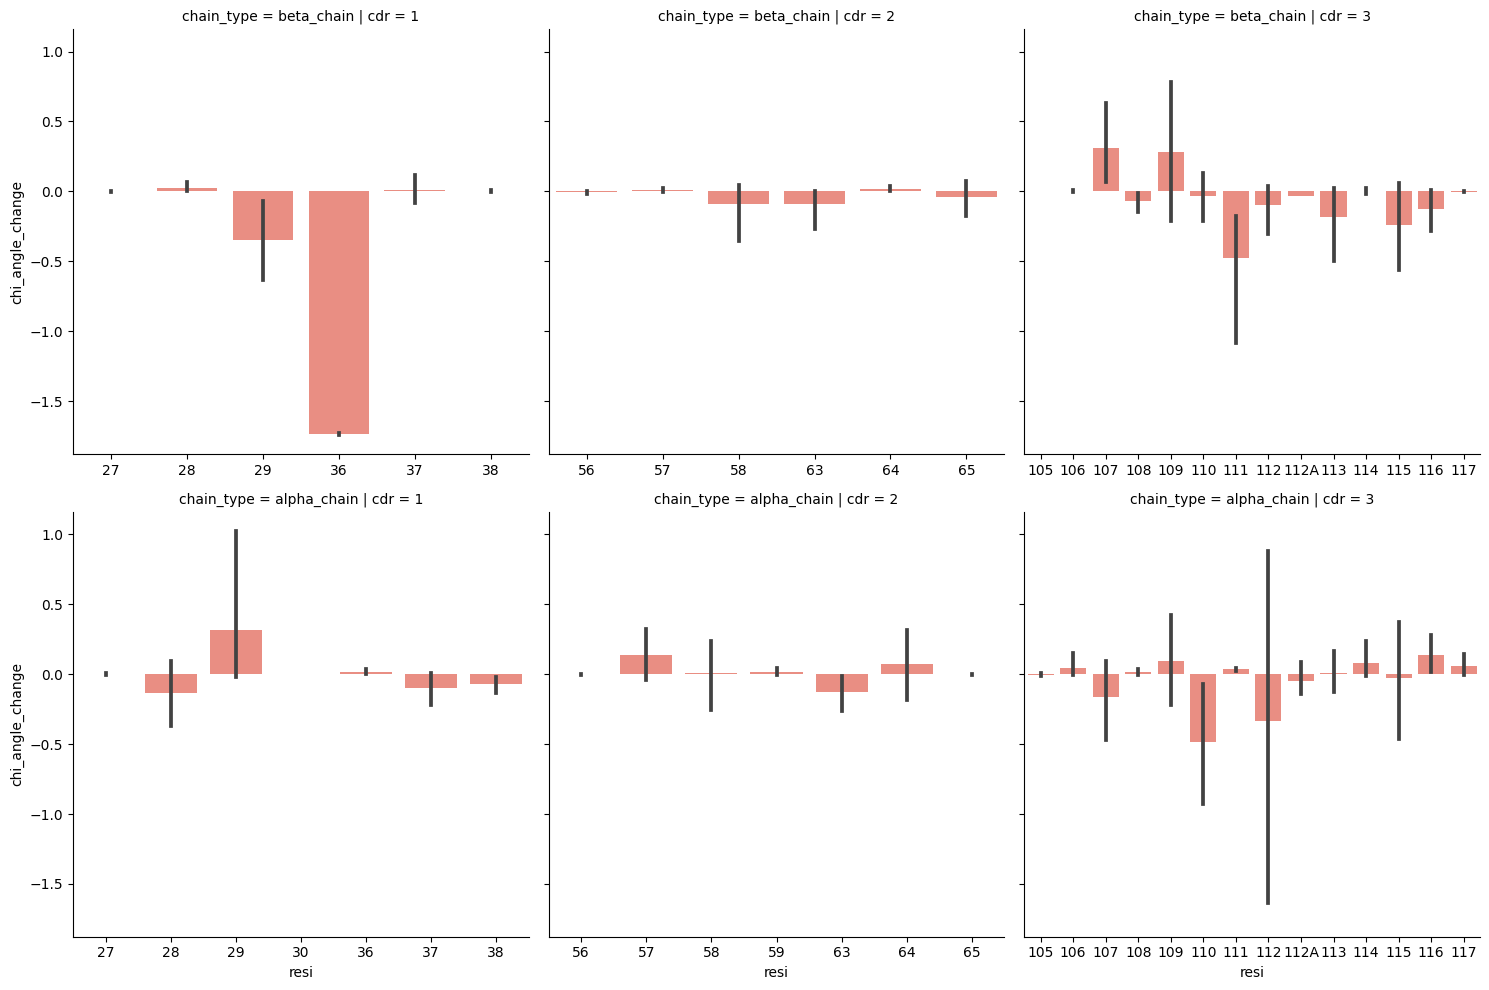

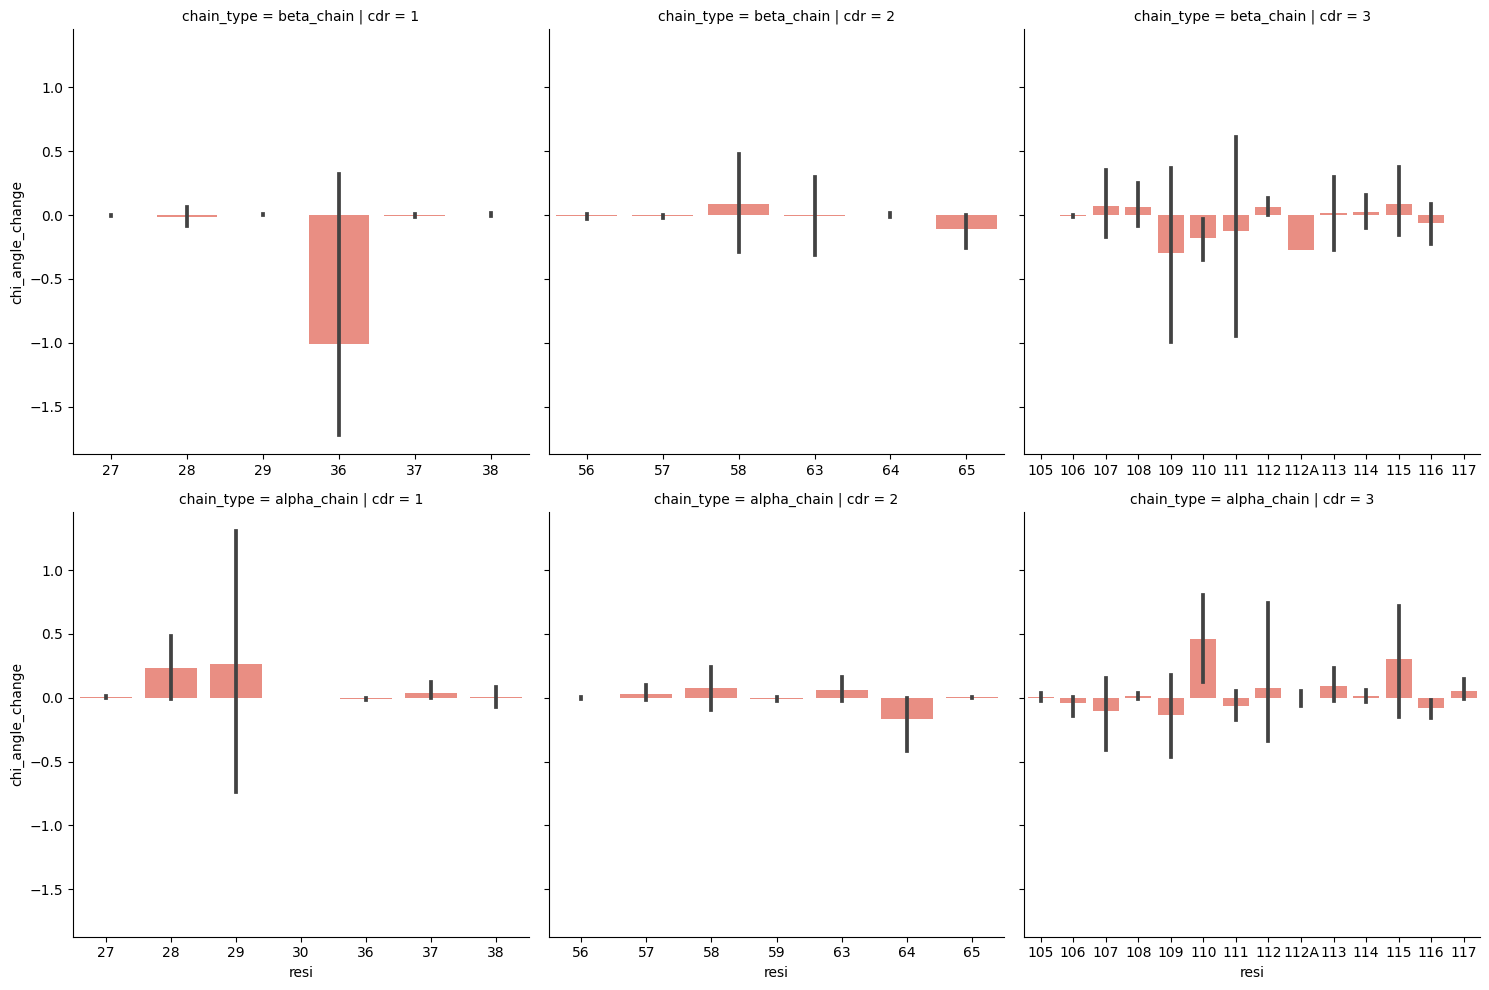

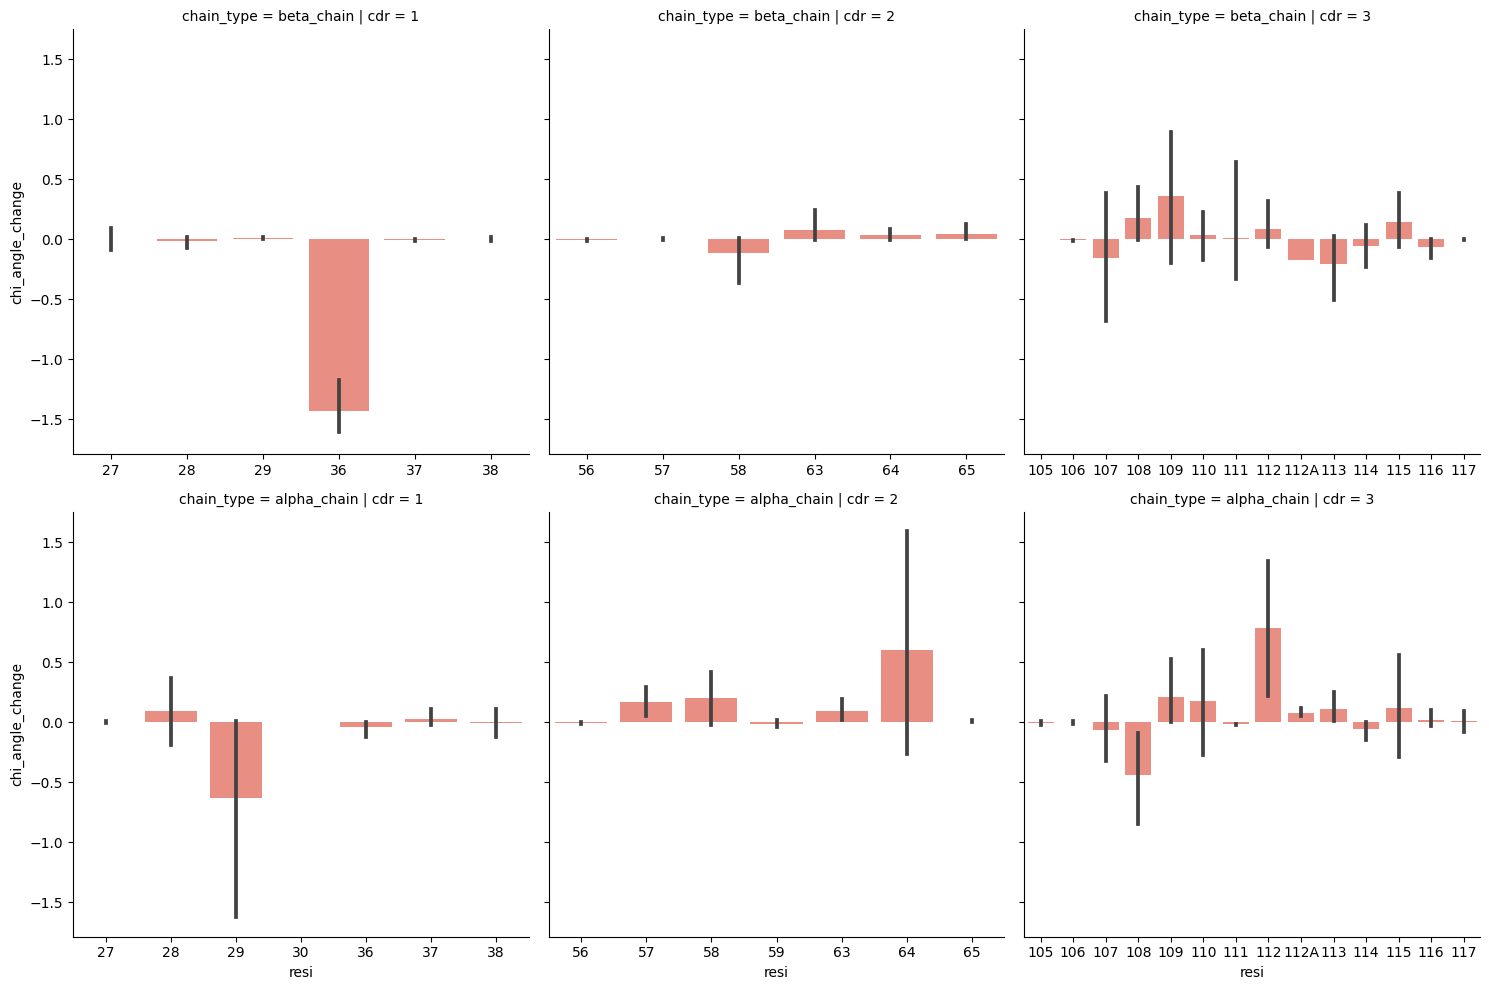

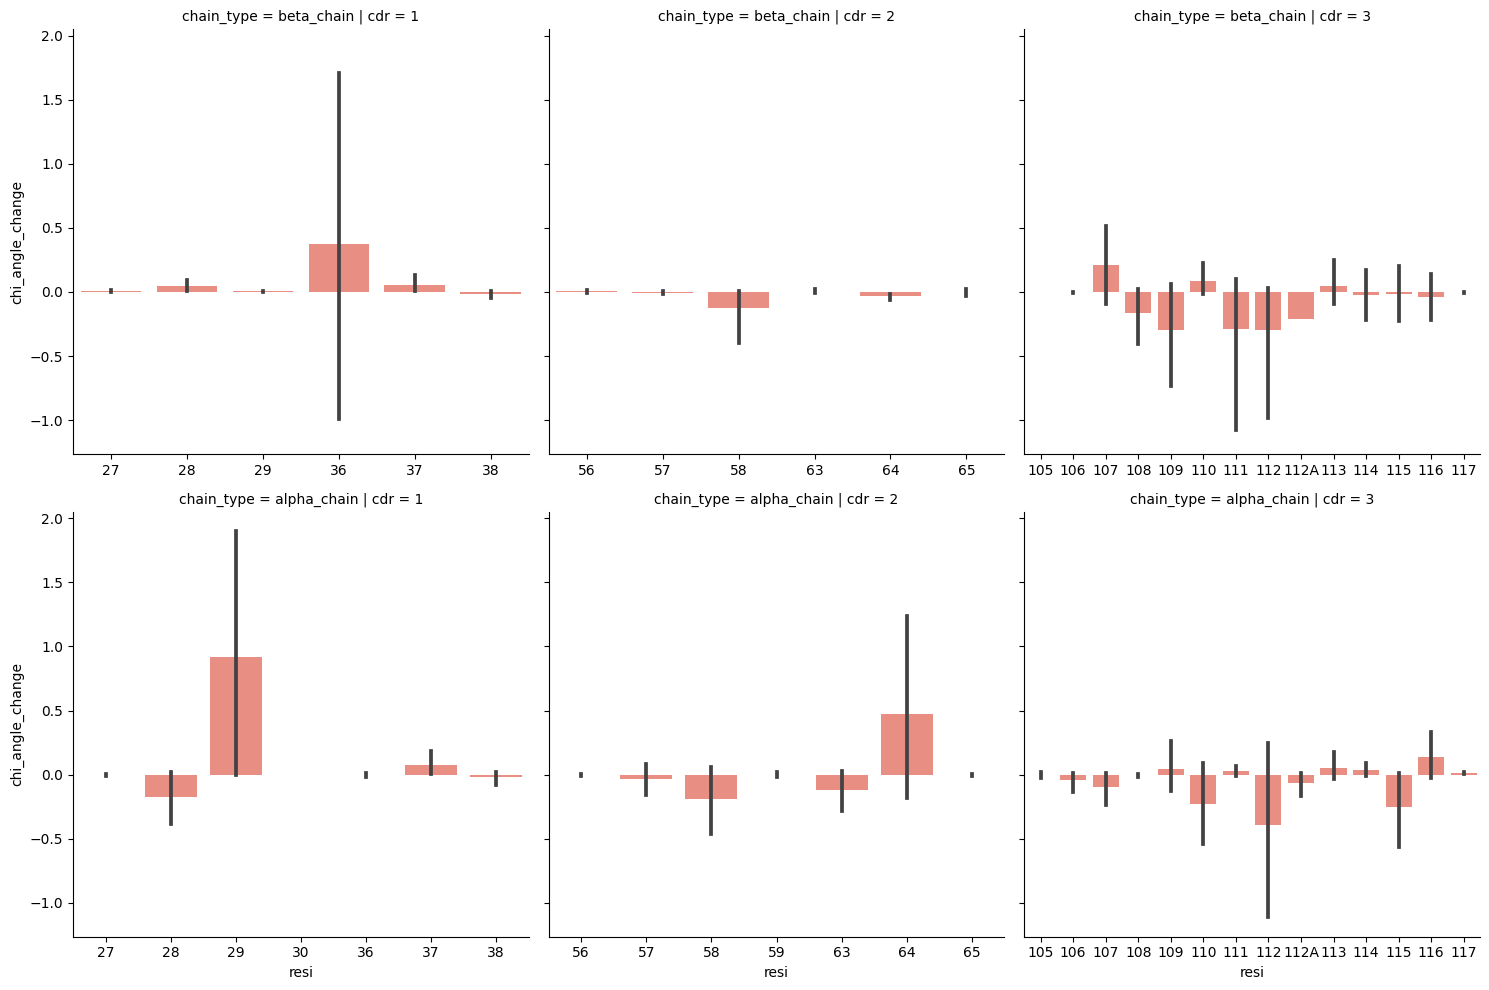

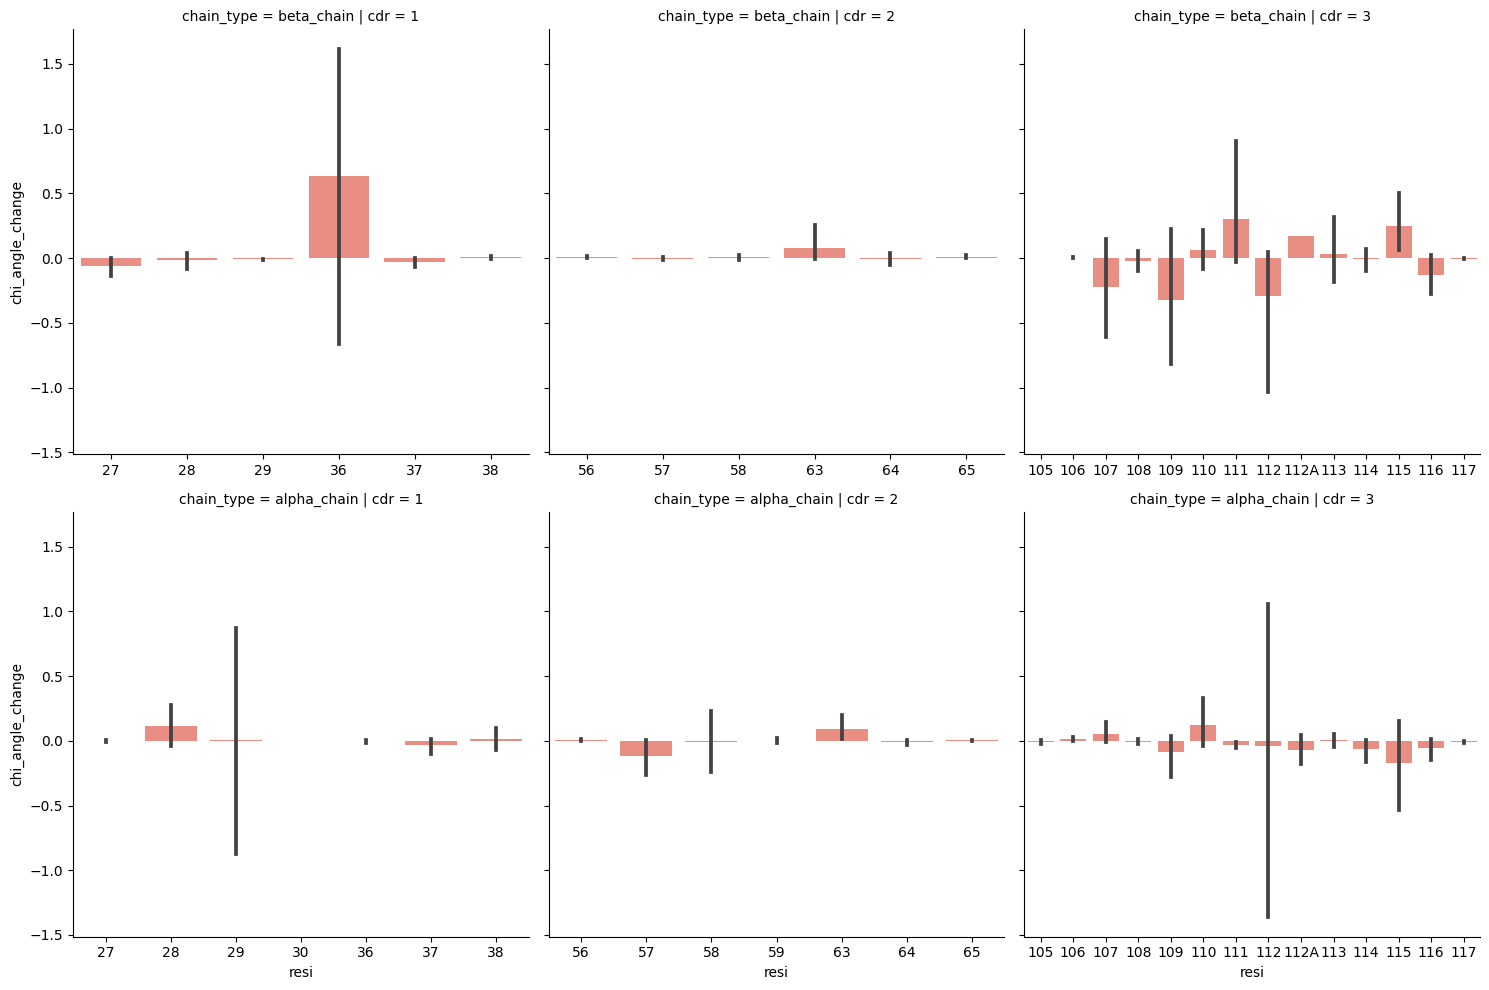

In [28]:
for model_rank in range(5):
    sns.catplot(apo_holo_chi.query('model_rank == @model_rank').sort_values('resi'),
                x='resi', y='chi_angle_change',
                row='chain_type', col='cdr',
                color='salmon',
                sharex=False,
                kind='bar')

/package/python-cbrg/current/3.11/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/package/python-cbrg/current/3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/package/python-cbrg/current/3.11/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/package/python-cbrg/current/3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/package/python-cbrg/current/3.11/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


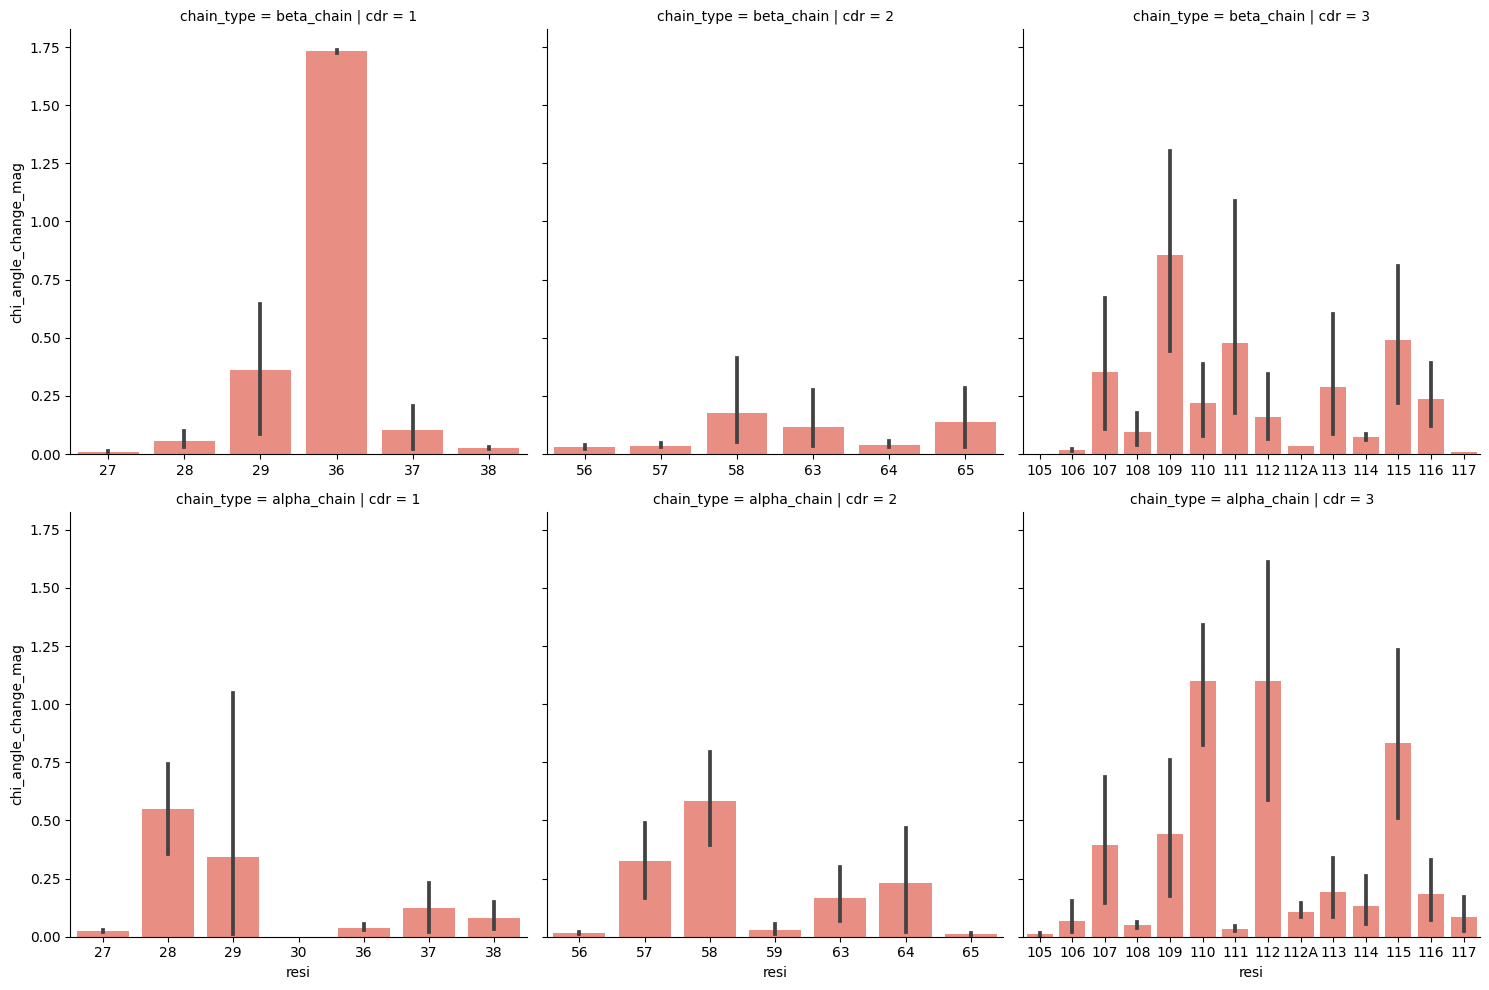

In [30]:
sns.catplot(apo_holo_chi.query('model_rank == 0').sort_values('resi'),
            x='resi', y='chi_angle_change_mag',
            row='chain_type', col='cdr',
            color='salmon',
            sharex=False,
            kind='bar')

/package/python-cbrg/current/3.11/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/package/python-cbrg/current/3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/package/python-cbrg/current/3.11/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/package/python-cbrg/current/3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/package/python-cbrg/current/3.11/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


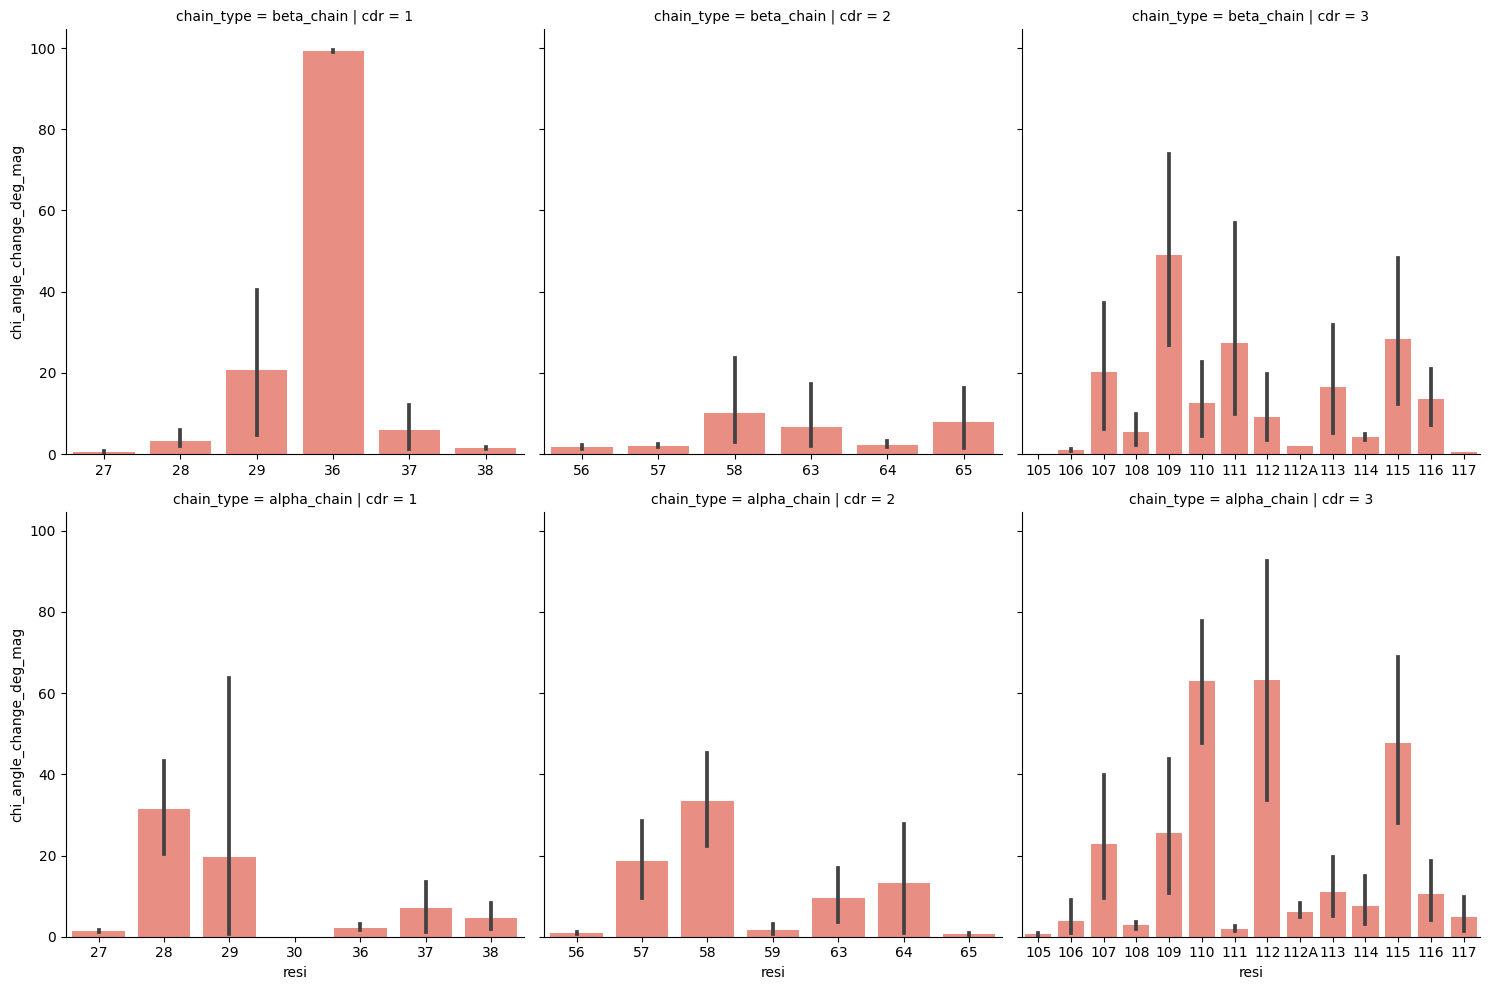

In [32]:
sns.catplot(apo_holo_chi.query('model_rank == 0').sort_values('resi'),
            x='resi', y='chi_angle_change_deg_mag',
            row='chain_type', col='cdr',
            color='salmon',
            sharex=False,
            kind='bar')

## Correlation

In [36]:
results = results_ca.merge(results_rmsd).merge(results_chi)
results

,group,struct1,struct2,cdr,chain_type,residue_name,residue_seq_id,residue_insert_code,ca_distance,resi,struct_1_form,struct_2_form,struct_1_model_rank,struct_2_model_rank,rmsd,chi_angle_change,chi_angle_change_mag,chi_angle_change_deg_mag
0,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,ASN,27,None,26.607766,27,holo,holo,2,0,24.727784,-0.027690,0.027690,1.586524
1,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,SER,28,None,27.995617,28,holo,holo,2,0,27.884440,-0.018598,0.018598,1.065573
2,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,ALA,29,None,21.228204,29,holo,holo,2,0,20.421170,NaN,NaN,NaN
3,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,SER,36,None,18.146191,36,holo,holo,2,0,19.160792,-0.014077,0.014077,0.806566
4,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vrm_DEPA_holo_ranked_0.pdb,1,alpha_chain,GLN,37,None,15.863377,37,holo,holo,2,0,15.228438,1.778301,1.778301,101.889162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183685,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,TYR,113,None,21.878426,113,apo,holo,0,3,25.179544,0.040557,0.040557,2.323732
183686,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,ASN,114,None,17.685354,114,apo,holo,0,3,16.524539,0.094998,0.094998,5.443010
183687,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,GLU,115,None,20.288778,115,apo,holo,0,3,21.467078,4.354926,4.354926,249.518881
183688,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dx9_AB_apo_ranked_0.pdb,3dxa_DECA_holo_ranked_3.pdb,3,beta_chain,GLN,116,None,16.879069,116,apo,holo,0,3,16.239713,-0.018200,0.018200,1.042799


In [39]:
apo_holo = results.query('(struct_1_form != struct_2_form) and (struct_1_model_rank == struct_2_model_rank)').copy()
apo_holo['model_rank'] = apo_holo['struct_1_model_rank']

apo_holo

,group,struct1,struct2,cdr,chain_type,residue_name,residue_seq_id,residue_insert_code,ca_distance,resi,struct_1_form,struct_2_form,struct_1_model_rank,struct_2_model_rank,rmsd,chi_angle_change,chi_angle_change_mag,chi_angle_change_deg_mag,model_rank
94,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vth_DE_apo_ranked_2.pdb,1,alpha_chain,ASN,27,None,37.623548,27,holo,apo,2,2,36.022270,0.026934,0.026934,1.543233,2
95,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vth_DE_apo_ranked_2.pdb,1,alpha_chain,SER,28,None,36.571606,28,holo,apo,2,2,35.444753,0.017818,0.017818,1.020924,2
96,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vth_DE_apo_ranked_2.pdb,1,alpha_chain,ALA,29,None,30.274306,29,holo,apo,2,2,30.221389,NaN,NaN,NaN,2
97,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vth_DE_apo_ranked_2.pdb,1,alpha_chain,SER,36,None,34.391253,36,holo,apo,2,2,35.341258,0.029661,0.029661,1.699476,2
98,AFNCTYSNSASQSFFWYRQD-EPKLLMSVYSSGNEDGRFTAQL-AT...,6vrm_DEPA_holo_ranked_2.pdb,6vth_DE_apo_ranked_2.pdb,1,alpha_chain,GLN,37,None,32.680597,37,holo,apo,2,2,29.852115,0.018439,0.018439,1.056492,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183501,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dxa_DECA_holo_ranked_0.pdb,3dx9_AB_apo_ranked_0.pdb,3,beta_chain,TYR,113,None,22.623419,113,holo,apo,0,0,26.204477,0.004383,0.004383,0.251099,0
183502,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dxa_DECA_holo_ranked_0.pdb,3dx9_AB_apo_ranked_0.pdb,3,beta_chain,ASN,114,None,17.679799,114,holo,apo,0,0,16.607597,-0.089264,0.089264,5.114453,0
183503,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dxa_DECA_holo_ranked_0.pdb,3dx9_AB_apo_ranked_0.pdb,3,beta_chain,GLU,115,None,19.982003,115,holo,apo,0,0,20.899713,-4.340407,4.340407,248.686984,0
183504,NLPCNHSTISGNEYVYWYRQI-GPQYIIHGLKNNETNEMASLII-A...,3dxa_DECA_holo_ranked_0.pdb,3dx9_AB_apo_ranked_0.pdb,3,beta_chain,GLN,116,None,16.522797,116,holo,apo,0,0,15.908017,-0.103717,0.103717,5.942534,0


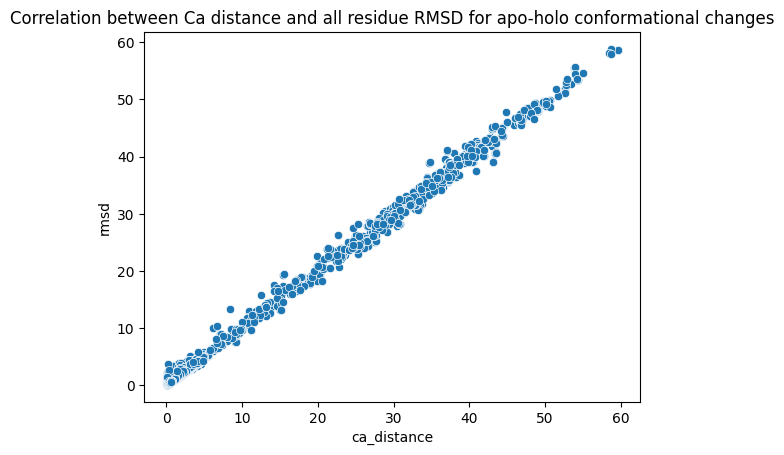

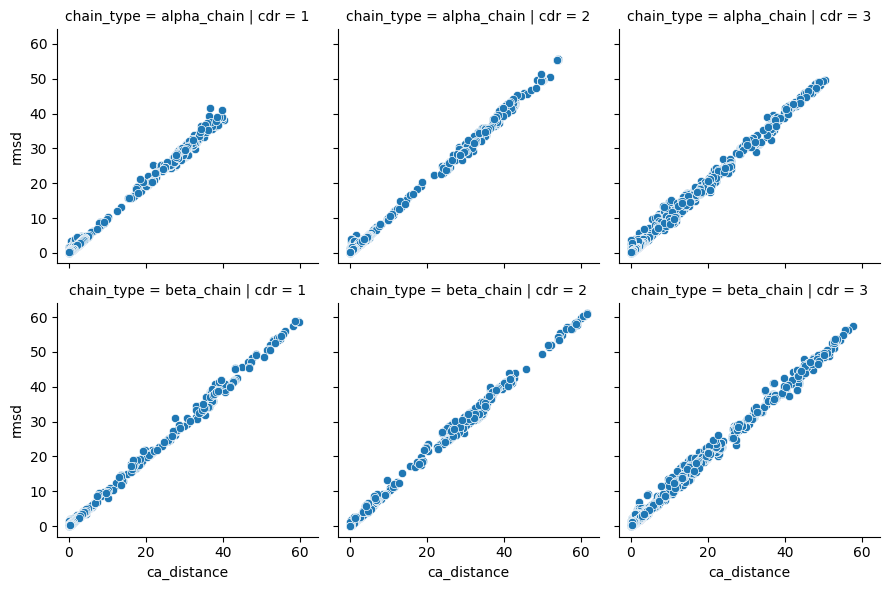

In [40]:
sns.scatterplot(apo_holo.query('model_rank == 0'), x='ca_distance', y='rmsd')
plt.title('Correlation between Ca distance and all residue RMSD for apo-holo conformational changes')

g = sns.FacetGrid(apo_holo, col='cdr', row='chain_type')
g.map(sns.scatterplot, 'ca_distance', 'rmsd')

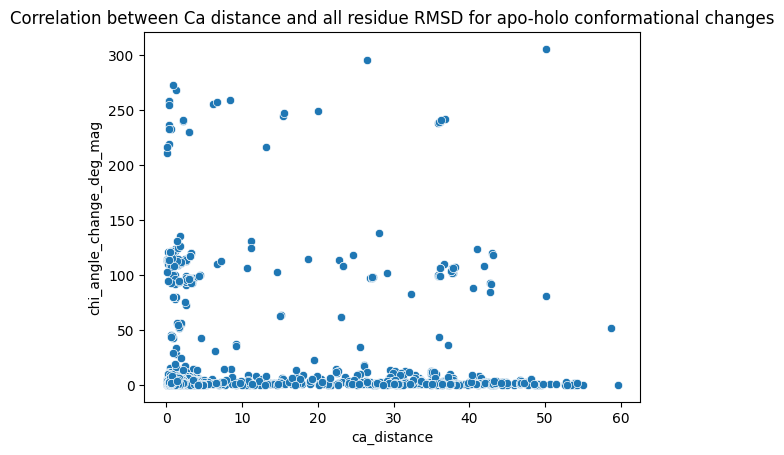

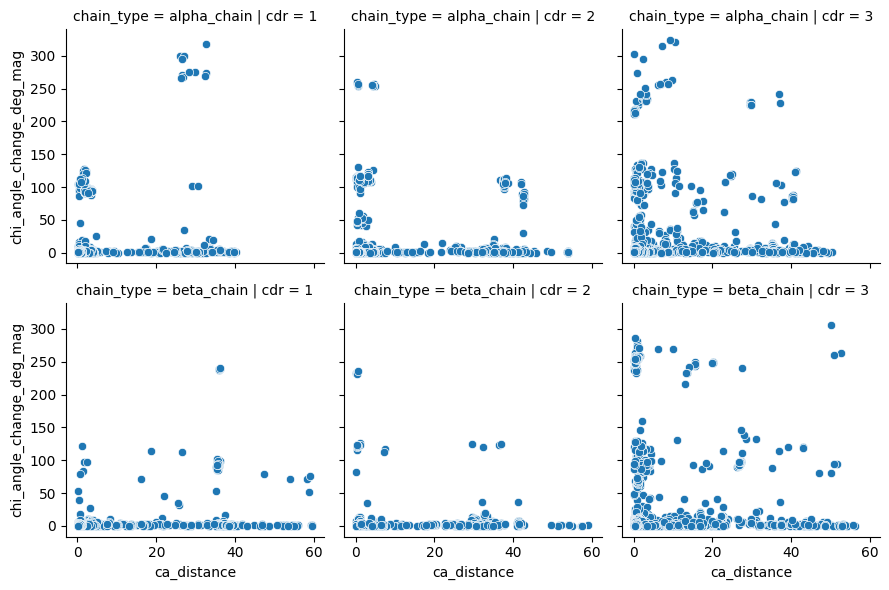

In [41]:
sns.scatterplot(apo_holo.query('model_rank == 0'), x='ca_distance', y='chi_angle_change_deg_mag')
plt.title('Correlation between Ca distance and all residue RMSD for apo-holo conformational changes')

g = sns.FacetGrid(apo_holo, col='cdr', row='chain_type')
g.map(sns.scatterplot, 'ca_distance', 'chi_angle_change_deg_mag')